In [1]:
from core.utils_data import getCleanGBMLGG
from core.utils_analysis import *
from tqdm import tqdm

# Glioma Grade Classification

In [2]:
models = ['omic', 'omicomic_fusion', 
          'graph', 'graphgraph_fusion', 
          'path', 'pathpath_fusion', 
          'pathomic_fusion', 'graphomic_fusion', 'pathgraphomic_fusion']
model_names = ['Genomic SNN', 'Genomic (SNN + SNN)',
               'Histology GCN', 'Histology (GCN + GCN)',
               'Histology CNN', 'Histology (CNN + CNN)',
               'Pathomic F. (CNN+SNN)', 'Pathomic F. (GCN+SNN)', 'Pathomic F. (CNN+GCN+SNN)']

In [3]:
cv_grad_split = pd.DataFrame(np.array([calcGradMetrics(*getPredAggGrad_GBMLGG(model=model, agg_type='max'))
                             for model in tqdm(models)]))
cv_grad_split.index = models
cv_grad_split.columns = ['Split %s' % str(k) for k in range(1,16)]
cv_grad_split

100%|██████████| 9/9 [00:24<00:00,  2.70s/it]


Split 1   Split 2   Split 3   Split 4   Split 5  \
omic                  0.871312  0.822277  0.847480  0.855975  0.866968   
omicomic_fusion       0.860721  0.829794  0.843031  0.850723  0.862099   
graph                 0.860901  0.857531  0.862670  0.872288  0.887270   
graphgraph_fusion     0.840184  0.886008  0.846565  0.876377  0.886063   
path                  0.902951  0.894184  0.873117  0.909708  0.906173   
pathpath_fusion       0.893546  0.894733  0.883316  0.913453  0.911578   
pathomic_fusion       0.915254  0.896406  0.914812  0.932837  0.926694   
graphomic_fusion      0.894027  0.877092  0.879224  0.933339  0.914390   
pathgraphomic_fusion  0.908840  0.897586  0.913076  0.944645  0.927133   

                       Split 6   Split 7   Split 8   Split 9  Split 10  \
omic                  0.850069  0.857409  0.834754  0.836628  0.816043   
omicomic_fusion       0.855981  0.854744  0.835260  0.829918  0.808988   
graph                 0.853498  0.825242  0.835647  0.822928  0.863190   
graphgraph_fusion     0.798834  0.855805  0.817012  0.847238  0.888668   
path                  0.873717  0.872535  0.871583  0.883020  0.866449   
pathpath_fusion       0.875816  0.894286  0.865536  0.883799  0.876228   
pathomic_fusion       0.890096  0.903344  0.864324  0.906229  0.883503   
graphomic_fusion      0.872346  0.888839  0.875579  0.893852  0.892889   
pathgraphomic_fusion  0.891193  0.904573  0.885369  0.910197  0.893991   

                      Split 11  Split 12  Split 13  Split 14  Split 15  
omic                  0.854379  0.865243  0.874150  0.840651  0.899963  
omicomic_fusion       0.859349  0.857338  0.870701  0.835514  0.899933  
graph                 0.839527  0.822680  0.833648  0.842200  0.859863  
graphgraph_fusion     0.824822  0.875752  0.843474  0.834826  0.846344  
path                  0.878491  0.874450  0.885488  0.865846  0.881409  
pathpath_fusion       0.889172  0.883471  0.885960  0.875473  0.890930  
pathomic_fusion       0.915133  0.908457  0.900542  0.900597  0.915497  
graphomic_fusion      0.906361  0.912936  0.910919  0.899593  0.909210  
pathgraphomic_fusion  0.920843  0.911991  0.912069  0.906939  0.894852

In [4]:
cv_grad = pd.DataFrame(np.array([calcAggGradMetrics(*getPredAggGrad_GBMLGG(model=model, agg_type='max'))
                       for model in tqdm(models)]))
cv_grad.index = models
cv_grad.columns = ['AUC', 'AP', 'F1', 'F1 Grade IV']
cv_grad

100%|██████████| 9/9 [00:24<00:00,  2.76s/it]


AUC              AP              F1  \
omic                  0.8529 ± 0.012  0.7294 ± 0.018  0.6518 ± 0.015   
omicomic_fusion       0.8503 ± 0.012  0.7245 ± 0.019  0.6508 ± 0.018   
graph                 0.8493 ± 0.011  0.7635 ± 0.012  0.6651 ± 0.019   
graphgraph_fusion     0.8512 ± 0.015  0.7625 ± 0.021  0.6502 ± 0.023   
path                  0.8826 ± 0.008  0.7930 ± 0.017  0.7166 ± 0.017   
pathpath_fusion       0.8878 ± 0.007  0.8071 ± 0.013  0.7151 ± 0.021   
pathomic_fusion       0.9049 ± 0.010  0.8326 ± 0.016  0.7299 ± 0.019   
graphomic_fusion      0.8974 ± 0.010  0.8124 ± 0.016  0.7140 ± 0.018   
pathgraphomic_fusion  0.9082 ± 0.008  0.8279 ± 0.016  0.7493 ± 0.020   

                         F1 Grade IV  
omic                  0.8567 ± 0.017  
omicomic_fusion       0.8560 ± 0.017  
graph                 0.8493 ± 0.011  
graphgraph_fusion     0.8124 ± 0.022  
path                  0.8732 ± 0.013  
pathpath_fusion       0.8793 ± 0.015  
pathomic_fusion       0.9125 ± 0.011  
graphomic_fusion      0.9024 ± 0.014  
pathgraphomic_fusion  0.9195 ± 0.014

Class: 0
	path - AUC: 0.858 ± 0.024
	omic - AUC: 0.842 ± 0.026
	pathgraphomic_fusion - AUC: 0.880 ± 0.025
Class: 1
	path - AUC: 0.788 ± 0.025
	omic - AUC: 0.678 ± 0.046
	pathgraphomic_fusion - AUC: 0.810 ± 0.029
Class: 2
	path - AUC: 0.956 ± 0.015
	omic - AUC: 0.921 ± 0.021
	pathgraphomic_fusion - AUC: 0.977 ± 0.009
Class: micro
	path - AUC: 0.883 ± 0.014
	omic - AUC: 0.853 ± 0.021
	pathgraphomic_fusion - AUC: 0.908 ± 0.015


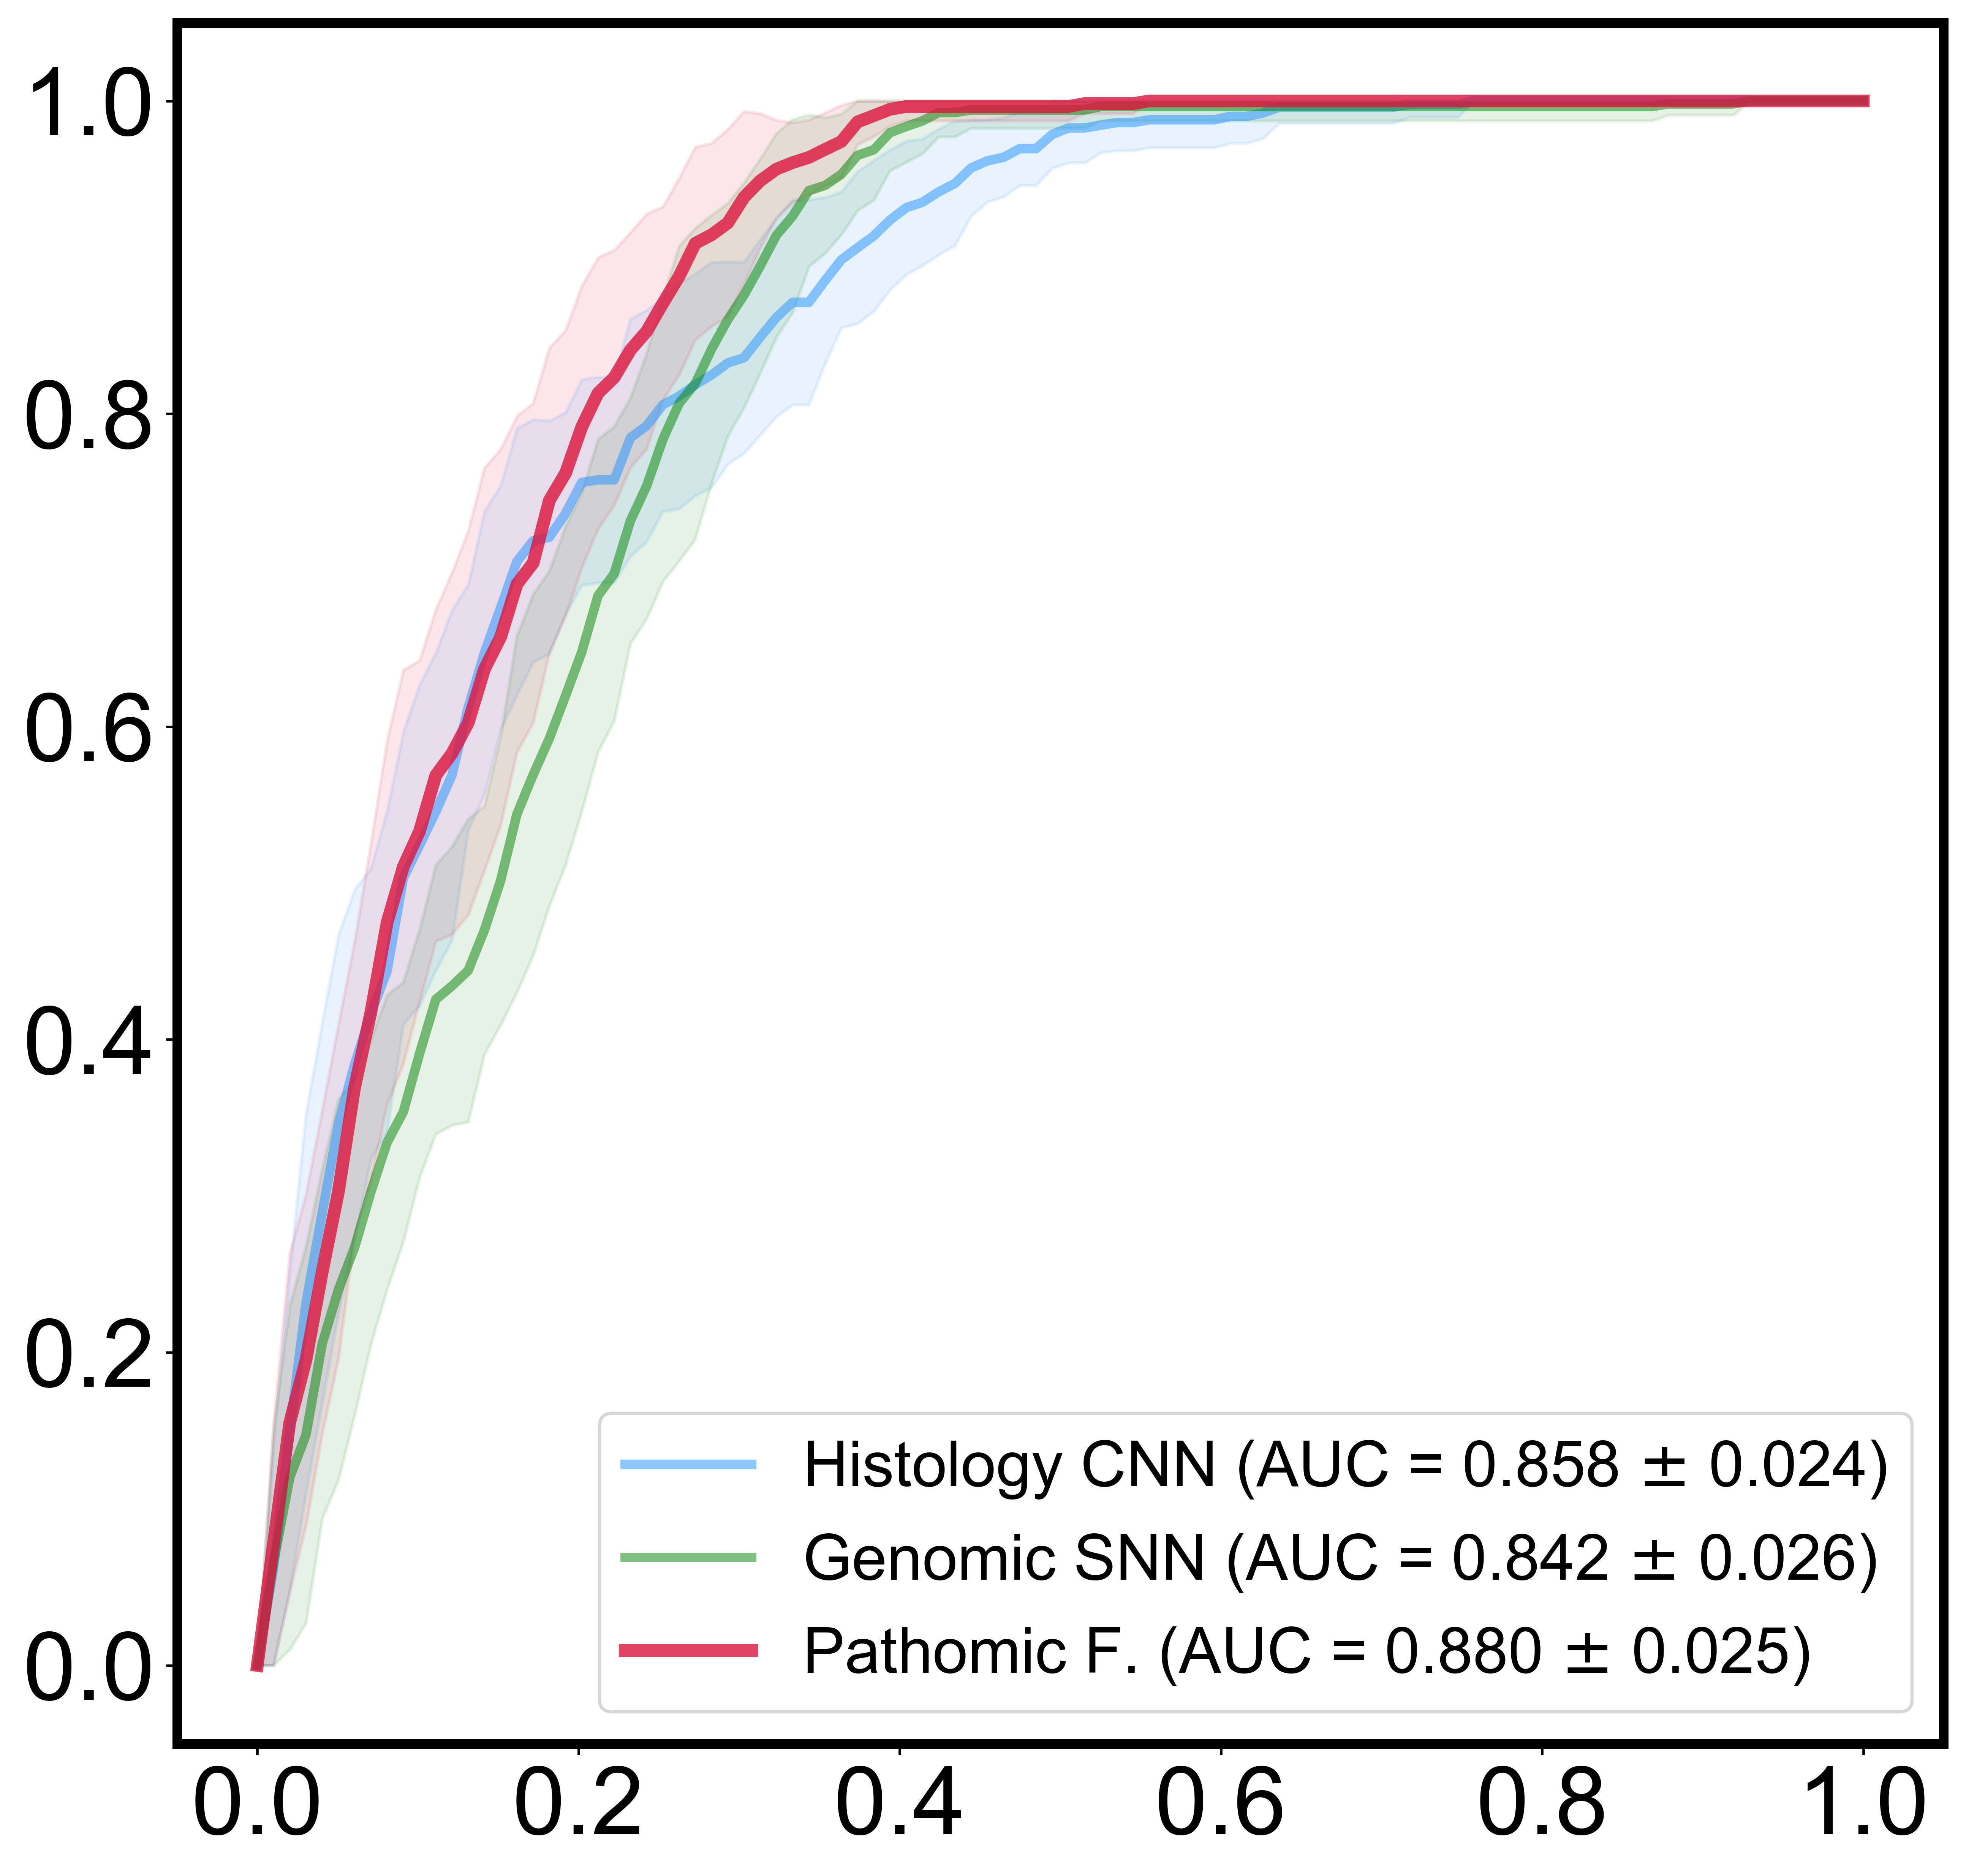

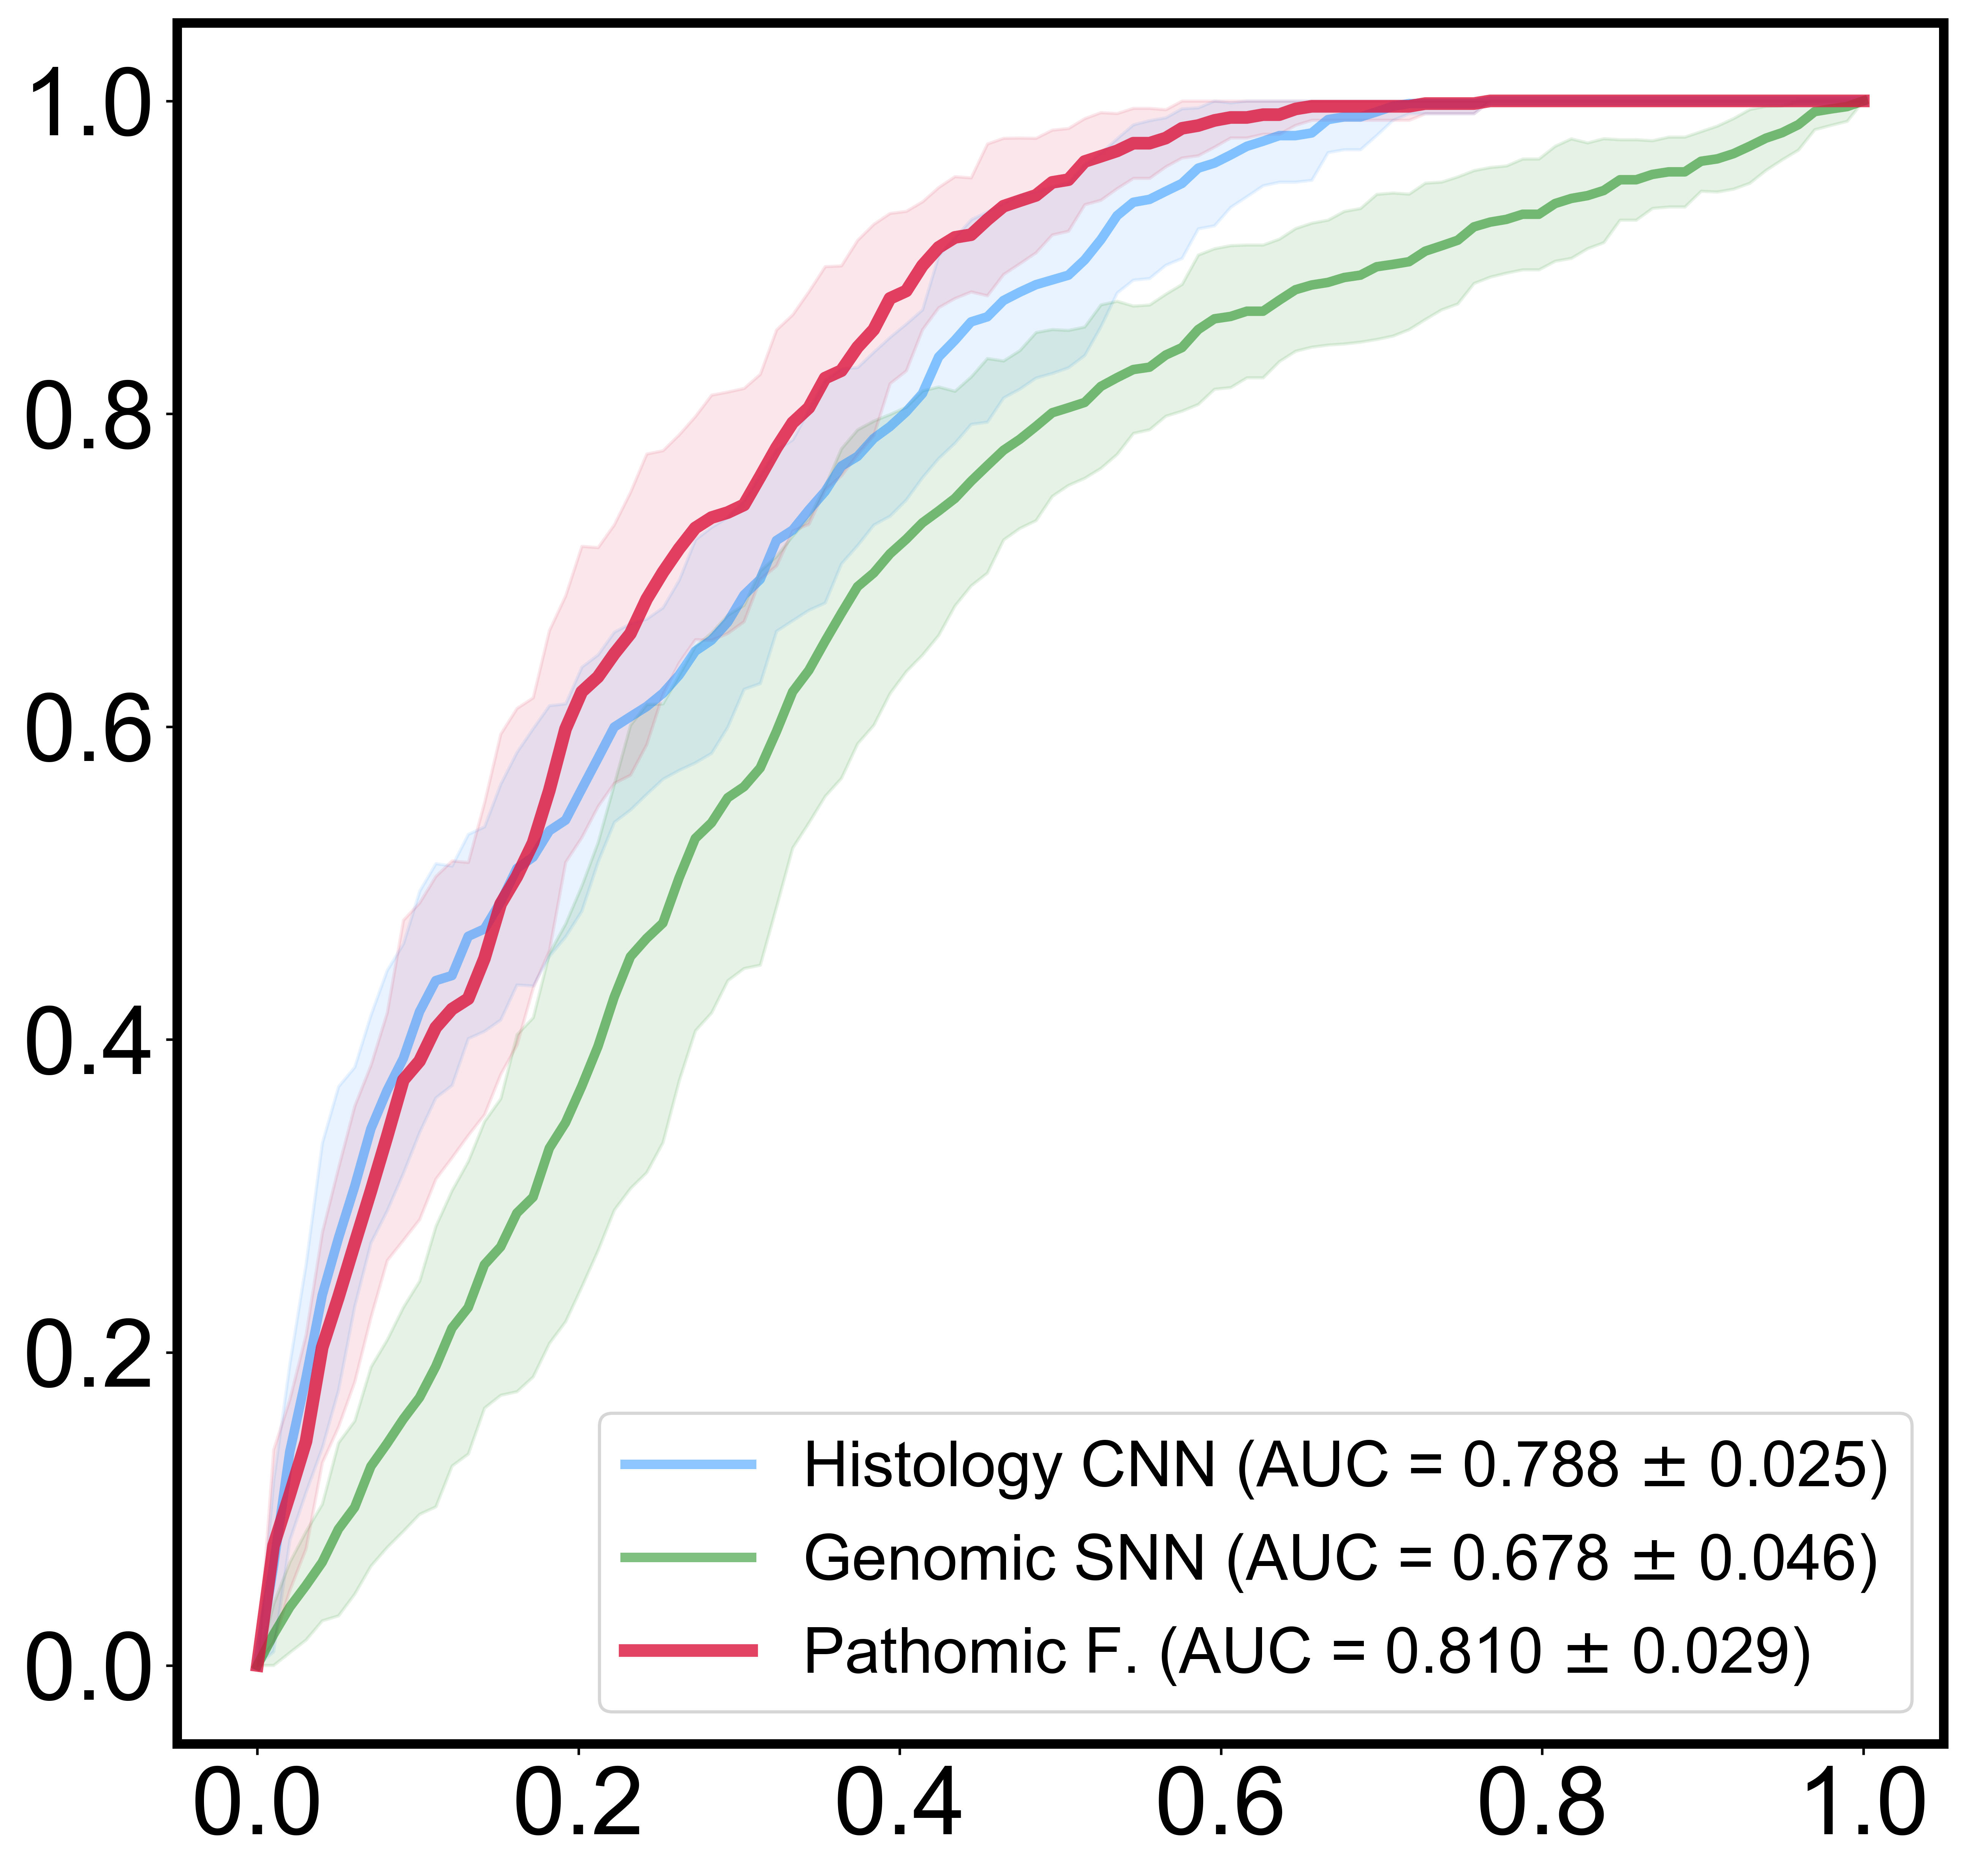

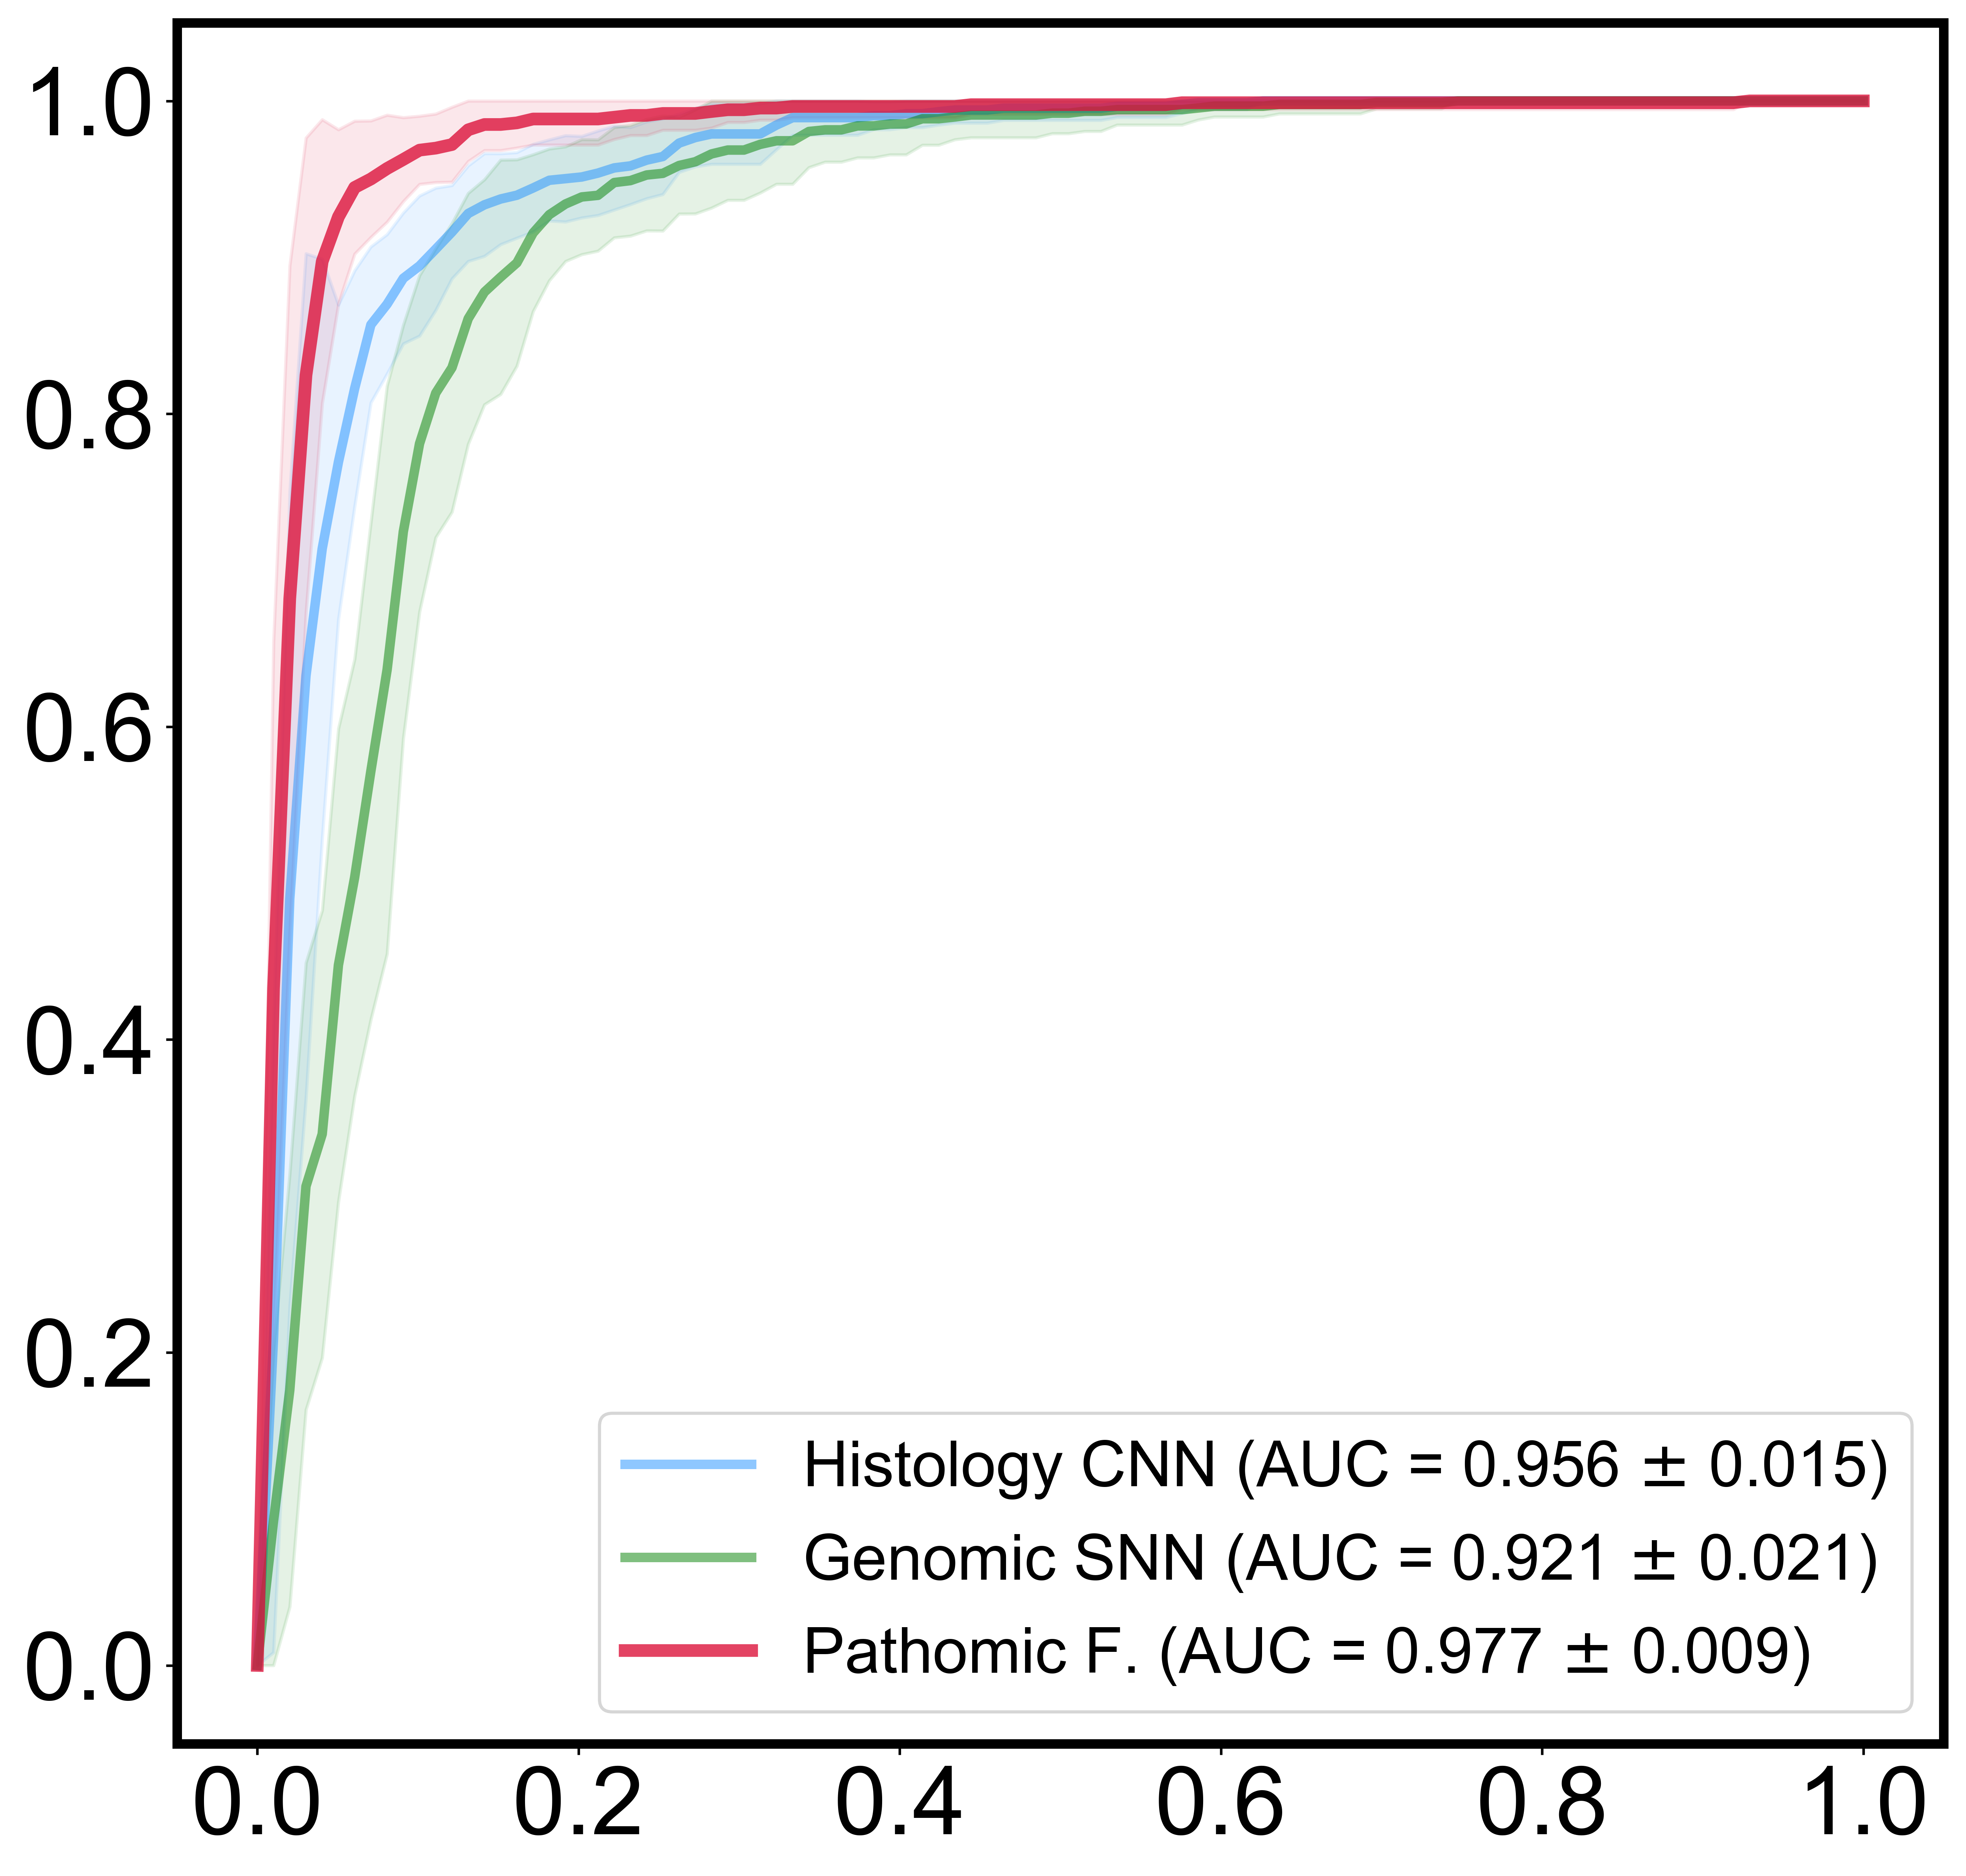

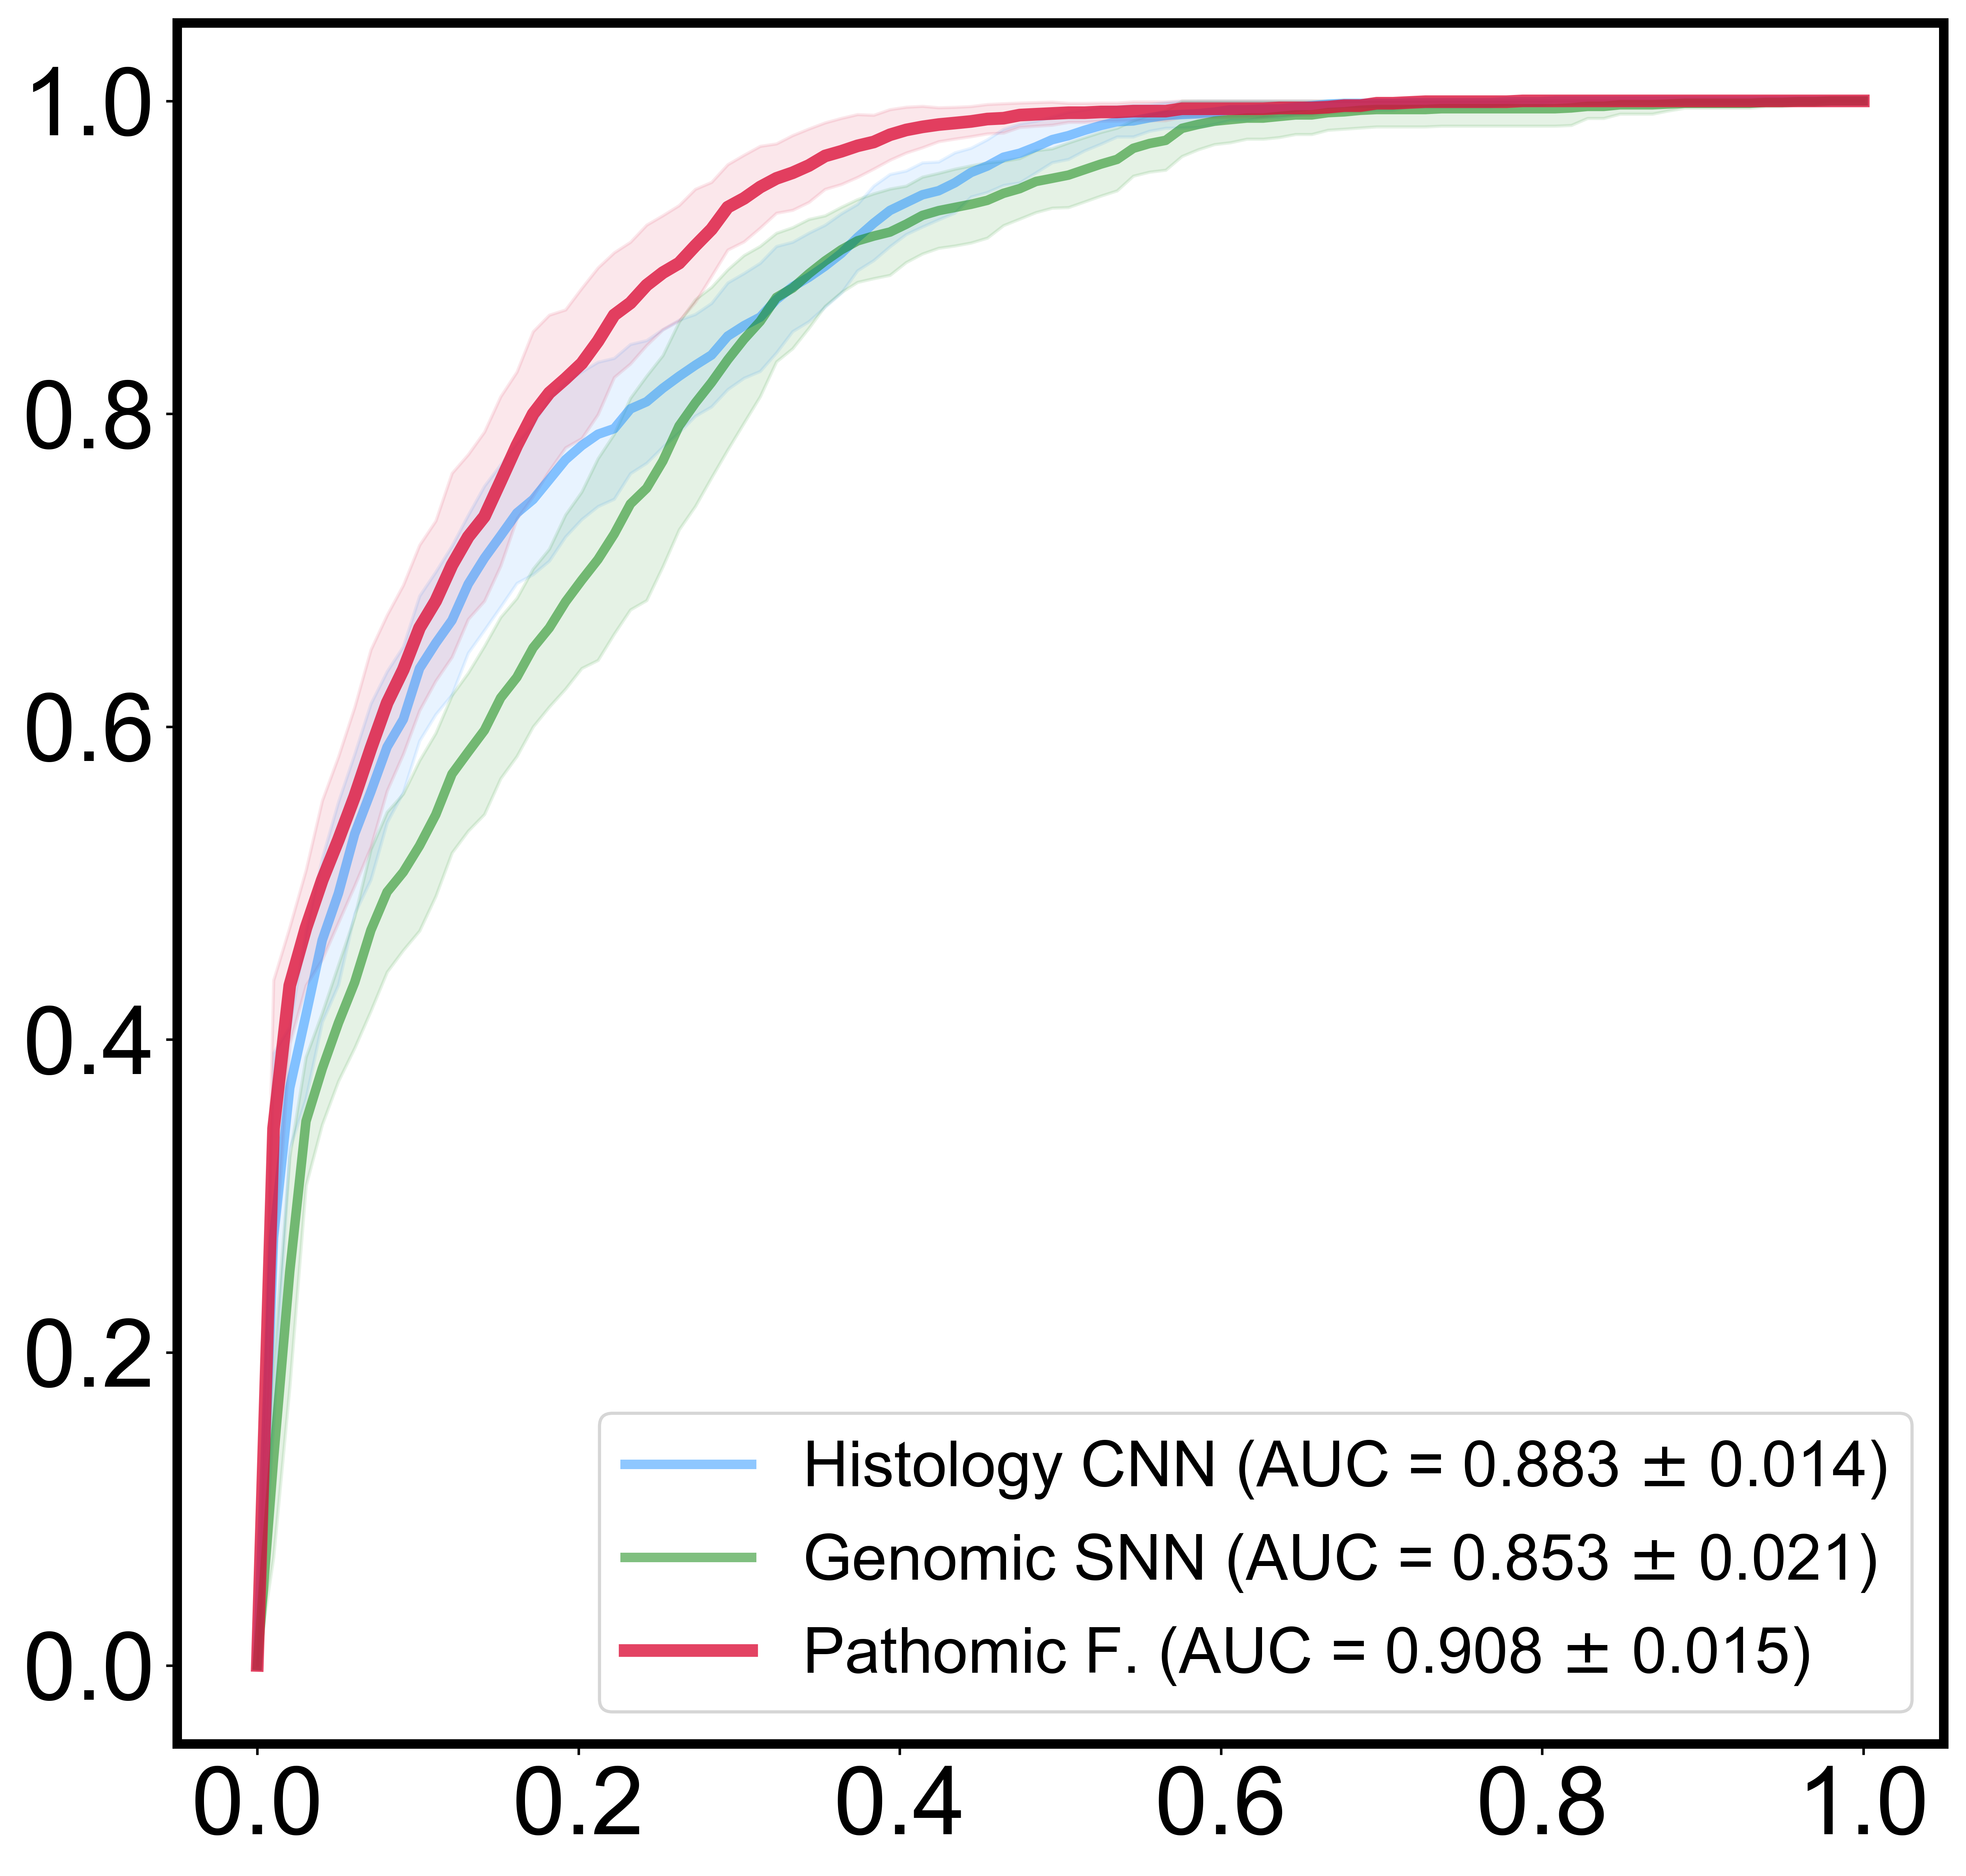

In [9]:
makeAUROCPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/grad_15/', model_list=['path', 'omic', 'pathgraphomic_fusion'])

# Glioma Survival Outcome Prediction

### 1. Cox Baselines

In [33]:
trainCox_GBMLGG(model='cox_agegender', penalizer=0)

# Missing Molecular Subtype: 72
# Missing IDH Mutation: 72
# Missing 1p19q Codeletion: 72
# Missing Histological Subtype: 33
# Missing Grade: 33
C-Indices across Splits [0.7147273749297358, 0.7541977611940298, 0.7130471859010802, 0.7310171356704921, 0.7507861635220126, 0.7054662379421222, 0.7450995889977869, 0.7210217626176879, 0.7041129032258064, 0.7815342837746097, 0.7158008268919648, 0.7386735170481084, 0.7499293785310734, 0.725032637075718, 0.7236298932384342]
Average C-Index: 0.7316 ± 0.012


In [34]:
trainCox_GBMLGG(model='cox_moltype', penalizer=0)

# Missing Molecular Subtype: 72
# Missing IDH Mutation: 72
# Missing 1p19q Codeletion: 72
# Missing Histological Subtype: 33
# Missing Grade: 33
C-Indices across Splits [0.7472989195678271, 0.7591567291311755, 0.7115270350564468, 0.7548087085182836, 0.7435778108711839, 0.7573443008225617, 0.7743609456083029, 0.7667284522706209, 0.796311391889138, 0.7691740412979351, 0.7644585987261147, 0.7482376636455186, 0.7598806093042404, 0.7565323070690703, 0.7835834226509467]
Average C-Index: 0.7595 ± 0.011


In [35]:
trainCox_GBMLGG(model='cox_grade', penalizer=0)

# Missing Molecular Subtype: 72
# Missing IDH Mutation: 72
# Missing 1p19q Codeletion: 72
# Missing Histological Subtype: 33
# Missing Grade: 33
C-Indices across Splits [0.7134590995561192, 0.7231285988483686, 0.7055277859453102, 0.7338403041825095, 0.7070940170940171, 0.7394244105409153, 0.7776695877961701, 0.7350643008302132, 0.7878787878787878, 0.7458748327634904, 0.7300304298212248, 0.740462023101155, 0.7244370054777846, 0.7619384506544039, 0.7427146024707]
Average C-Index: 0.7379 ± 0.013


In [22]:
trainCox_GBMLGG(model='cox_molgrade', penalizer=0)

# Missing Molecular Subtype: 72
# Missing IDH Mutation: 72
# Missing 1p19q Codeletion: 72
# Missing Histological Subtype: 33
# Missing Grade: 33
C-Indices across Splits [0.7467735627688697, 0.7828759604829857, 0.7410034957844952, 0.7757697456492637, 0.7578443357783211, 0.7736149437486733, 0.8152903990517582, 0.7909964692036092, 0.8236830648672181, 0.7919983670136762, 0.7744778953078384, 0.7514867337602927, 0.7719534050179212, 0.7828816920026438, 0.7699017445357931]
Average C-Index: 0.7767 ± 0.013


### 2. Statistical Significance + Ensembling Effects in Pathomic Fusion

In [24]:
models = ['cox_agegender', 'cox_moltype', 'cox_grade', 'cox_molgrade',
          'omic', 'omicomic_fusion', 
          'graph', 'graphgraph_fusion', 
          'path', 'pathpath_fusion', 
          'pathomic_fusion', 'graphomic_fusion', 'pathgraphomic_fusion']
model_names = ['Cox (Age+Gender)', 'Cox (Subtype)', 'Cox (Grade)', 'Cox (Grade+Subtype)',
               'Genomic SNN', 'Genomic (SNN + SNN)',
               'Histology GCN', 'Histology (GCN + GCN)',
               'Histology CNN', 'Histology (CNN + CNN)',
               'Pathomic F. (CNN+SNN)', 'Pathomic F. (GCN+SNN)', 'Pathomic F. (CNN+GCN+SNN)']

In [25]:
ckpt_name = './checkpoints/TCGA_GBMLGG/surv_15_rnaseq/'
pvalue_surv_multi = [np.array(getPValAggSurv_GBMLGG_Multi(ckpt_name=ckpt_name, model=model, percentile=[33,66])) for model in tqdm(models)]
pvalue_surv_multi = pd.DataFrame(np.array(pvalue_surv_multi))
pvalue_surv_binary = [np.array(getPValAggSurv_GBMLGG_Binary(ckpt_name=ckpt_name, model=model, percentile=[50])) for model in tqdm(models)]
pvalue_surv_binary = pd.DataFrame(np.array(pvalue_surv_binary))
pvalue_surv = pd.concat([pvalue_surv_binary, pvalue_surv_multi],axis=1)
pvalue_surv.index = model_names
pvalue_surv.columns = ['P-Value (<50% vs. >50%)', 'P-Value (<33% vs. 33-66%)', 'P-Value (33-66% vs. >66%)']

cv_surv = [np.array(getPredAggSurv_GBMLGG(ckpt_name=ckpt_name, model=model)) for model in tqdm(models)]
cv_surv = pd.DataFrame(np.array(cv_surv))
cv_surv.columns = ['Split %s' % str(k) for k in range(1,16)]
cv_surv.index = model_names
cv_surv['C-Index'] = [CI_pm(cv_surv.loc[model]) for model in model_names]
cv_surv_all = cv_surv[['C-Index']].join(pvalue_surv, how='inner')

100%|██████████| 13/13 [00:04<00:00,  3.09it/s]


In [26]:
cv_surv

Split 1   Split 2   Split 3   Split 4   Split 5  \
Cox (Age+Gender)           0.714727  0.754198  0.713047  0.731017  0.750786   
Cox (Subtype)              0.747299  0.759157  0.711527  0.754809  0.743578   
Cox (Grade)                0.713459  0.723129  0.705528  0.733840  0.707094   
Cox (Grade+Subtype)        0.746774  0.782876  0.741003  0.775770  0.757844   
Genomic SNN                0.801720  0.811038  0.779365  0.819041  0.791691   
Genomic (SNN + SNN)        0.769947  0.794541  0.765714  0.784520  0.778635   
Histology GCN              0.781653  0.797241  0.689524  0.787791  0.715134   
Histology (GCN + GCN)      0.780698  0.795441  0.687619  0.784157  0.715727   
Histology CNN              0.790253  0.802040  0.741587  0.815407  0.762611   
Histology (CNN + CNN)      0.794553  0.803239  0.739683  0.816860  0.763798   
Pathomic F. (CNN+SNN)      0.822026  0.814937  0.802857  0.826308  0.784273   
Pathomic F. (GCN+SNN)      0.797420  0.820636  0.781270  0.823401  0.786647   
Pathomic F. (CNN+GCN+SNN)  0.821787  0.819136  0.807302  0.827762  0.797923   

                            Split 6   Split 7   Split 8   Split 9  Split 10  \
Cox (Age+Gender)           0.705466  0.745100  0.721022  0.704113  0.781534   
Cox (Subtype)              0.757344  0.774361  0.766728  0.796311  0.769174   
Cox (Grade)                0.739424  0.777670  0.735064  0.787879  0.745875   
Cox (Grade+Subtype)        0.773615  0.815290  0.790996  0.823683  0.791998   
Genomic SNN                0.818544  0.804608  0.846867  0.817257  0.829305   
Genomic (SNN + SNN)        0.808020  0.803754  0.826346  0.808542  0.809063   
Histology GCN              0.689420  0.811718  0.742718  0.780941  0.709366   
Histology (GCN + GCN)      0.688851  0.810011  0.738747  0.777455  0.709366   
Histology CNN              0.778157  0.827076  0.801412  0.775712  0.781873   
Histology (CNN + CNN)      0.778726  0.835040  0.810680  0.768158  0.791541   
Pathomic F. (CNN+SNN)      0.817691  0.810011  0.834951  0.830912  0.834139   
Pathomic F. (GCN+SNN)      0.819966  0.808589  0.839365  0.821906  0.819033   
Pathomic F. (CNN+GCN+SNN)  0.824801  0.841581  0.852162  0.839338  0.828399   

                           Split 11  Split 12  Split 13  Split 14  Split 15  \
Cox (Age+Gender)           0.715801  0.738674  0.749929  0.725033  0.723630   
Cox (Subtype)              0.764459  0.748238  0.759881  0.756532  0.783583   
Cox (Grade)                0.730030  0.740462  0.724437  0.761938  0.742715   
Cox (Grade+Subtype)        0.774478  0.751487  0.771953  0.782882  0.769902   
Genomic SNN                0.829596  0.759356  0.768149  0.796670  0.848205   
Genomic (SNN + SNN)        0.801196  0.744386  0.776978  0.804312  0.839757   
Histology GCN              0.723468  0.757485  0.741007  0.717795  0.751320   
Histology (GCN + GCN)      0.728700  0.744760  0.742315  0.716157  0.750792   
Histology CNN              0.809417  0.831587  0.781557  0.775109  0.808342   
Histology (CNN + CNN)      0.797459  0.825599  0.787443  0.771834  0.817846   
Pathomic F. (CNN+SNN)      0.836697  0.815494  0.795291  0.841157  0.836589   
Pathomic F. (GCN+SNN)      0.820254  0.783308  0.803139  0.813046  0.843189   
Pathomic F. (CNN+GCN+SNN)  0.827354  0.805763  0.804120  0.840066  0.850053   

                                  C-Index  
Cox (Age+Gender)           0.7316 ± 0.012  
Cox (Subtype)              0.7595 ± 0.011  
Cox (Grade)                0.7379 ± 0.013  
Cox (Grade+Subtype)        0.7767 ± 0.013  
Genomic SNN                0.8081 ± 0.014  
Genomic (SNN + SNN)        0.7944 ± 0.014  
Histology GCN              0.7464 ± 0.022  
Histology (GCN + GCN)      0.7447 ± 0.021  
Histology CNN              0.7921 ± 0.014  
Histology (CNN + CNN)      0.7935 ± 0.014  
Pathomic F. (CNN+SNN)      0.8202 ± 0.009  
Pathomic F. (GCN+SNN)      0.8121 ± 0.010  
Pathomic F. (CNN+GCN+SNN)  0.8258 ± 0.009

In [27]:
cv_surv_all

C-Index  P-Value (<50% vs. >50%)  \
Cox (Age+Gender)           0.7316 ± 0.012             1.900892e-92   
Cox (Subtype)              0.7595 ± 0.011            2.064634e-228   
Cox (Grade)                0.7379 ± 0.013            5.998349e-224   
Cox (Grade+Subtype)        0.7767 ± 0.013            5.291938e-215   
Genomic SNN                0.8081 ± 0.014             1.519321e-52   
Genomic (SNN + SNN)        0.7944 ± 0.014             5.090139e-54   
Histology GCN              0.7464 ± 0.022             1.618834e-21   
Histology (GCN + GCN)      0.7447 ± 0.021             5.620511e-10   
Histology CNN              0.7921 ± 0.014             5.092422e-40   
Histology (CNN + CNN)      0.7935 ± 0.014             1.370966e-44   
Pathomic F. (CNN+SNN)      0.8202 ± 0.009             5.182205e-57   
Pathomic F. (GCN+SNN)      0.8121 ± 0.010             1.054539e-55   
Pathomic F. (CNN+GCN+SNN)  0.8258 ± 0.009             7.087806e-57   

                           P-Value (<33% vs. 33-66%)  \
Cox (Age+Gender)                        1.475424e-38   
Cox (Subtype)                           4.653368e-26   
Cox (Grade)                             9.568192e-23   
Cox (Grade+Subtype)                     1.140947e-40   
Genomic SNN                             1.531065e-01   
Genomic (SNN + SNN)                              NaN   
Histology GCN                           2.288528e-03   
Histology (GCN + GCN)                   8.043318e-02   
Histology CNN                           1.774952e-07   
Histology (CNN + CNN)                   1.966565e-06   
Pathomic F. (CNN+SNN)                   1.029138e-01   
Pathomic F. (GCN+SNN)                   2.089946e-01   
Pathomic F. (CNN+GCN+SNN)               2.681224e-03   

                           P-Value (33-66% vs. >66%)  
Cox (Age+Gender)                        5.927583e-27  
Cox (Subtype)                           1.444895e-51  
Cox (Grade)                             2.941556e-66  
Cox (Grade+Subtype)                     5.016280e-52  
Genomic SNN                             2.164183e-81  
Genomic (SNN + SNN)                    1.641976e-138  
Histology GCN                           4.202852e-15  
Histology (GCN + GCN)                   9.135586e-10  
Histology CNN                           6.604784e-25  
Histology (CNN + CNN)                   4.653116e-26  
Pathomic F. (CNN+SNN)                   4.562223e-79  
Pathomic F. (GCN+SNN)                   3.088825e-80  
Pathomic F. (CNN+GCN+SNN)               5.823266e-74

### 3. Plots

Grade II (%)  Grade III (%)  Grade IV (%)  ODG (%)  \
Density Region                                                               
-1.00 < Hazard < -0.50         53.22          33.90          1.36    17.63   
0.00 < Hazard < 0.75           29.03          60.22          6.09    23.30   
1.00 < Hazard < 1.50            7.65          29.51         62.84     7.10   
-1.00 < Hazard < 0.00          43.57          44.91          3.45    18.81   
0.00 < Hazard < 1.00           26.69          51.40         11.80    21.35   
1.00 < Hazard < 1.50            9.39          36.46         50.83    11.05   
-1.00 < Hazard < -0.50         47.83          39.28          1.61    25.77   
1.00 < Hazard < 1.25           15.42          43.17         40.97     4.85   
1.25 < Hazard < 1.50           12.88          40.15         45.45     4.17   
-1.00 < Hazard < -0.50         46.22          39.89          1.79    26.69   
1.00 < Hazard < 1.25           15.25          42.15         41.26     3.14   
1.25 < Hazard < 1.50            9.87          38.63         51.50     1.29   

                        IDHmut ATC (%)  IDHwt ATC (%)  
Density Region                                         
-1.00 < Hazard < -0.50           20.00           4.07  
0.00 < Hazard < 0.75             21.51          20.43  
1.00 < Hazard < 1.50             13.66          72.68  
-1.00 < Hazard < 0.00            21.69          15.16  
0.00 < Hazard < 1.00             18.54          24.44  
1.00 < Hazard < 1.50             11.05          60.22  
-1.00 < Hazard < -0.50           23.54           1.12  
1.00 < Hazard < 1.25             12.78          63.88  
1.25 < Hazard < 1.50              7.20          71.59  
-1.00 < Hazard < -0.50           22.83           0.96  
1.00 < Hazard < 1.25             11.66          64.13  
1.25 < Hazard < 1.50              5.15          81.55

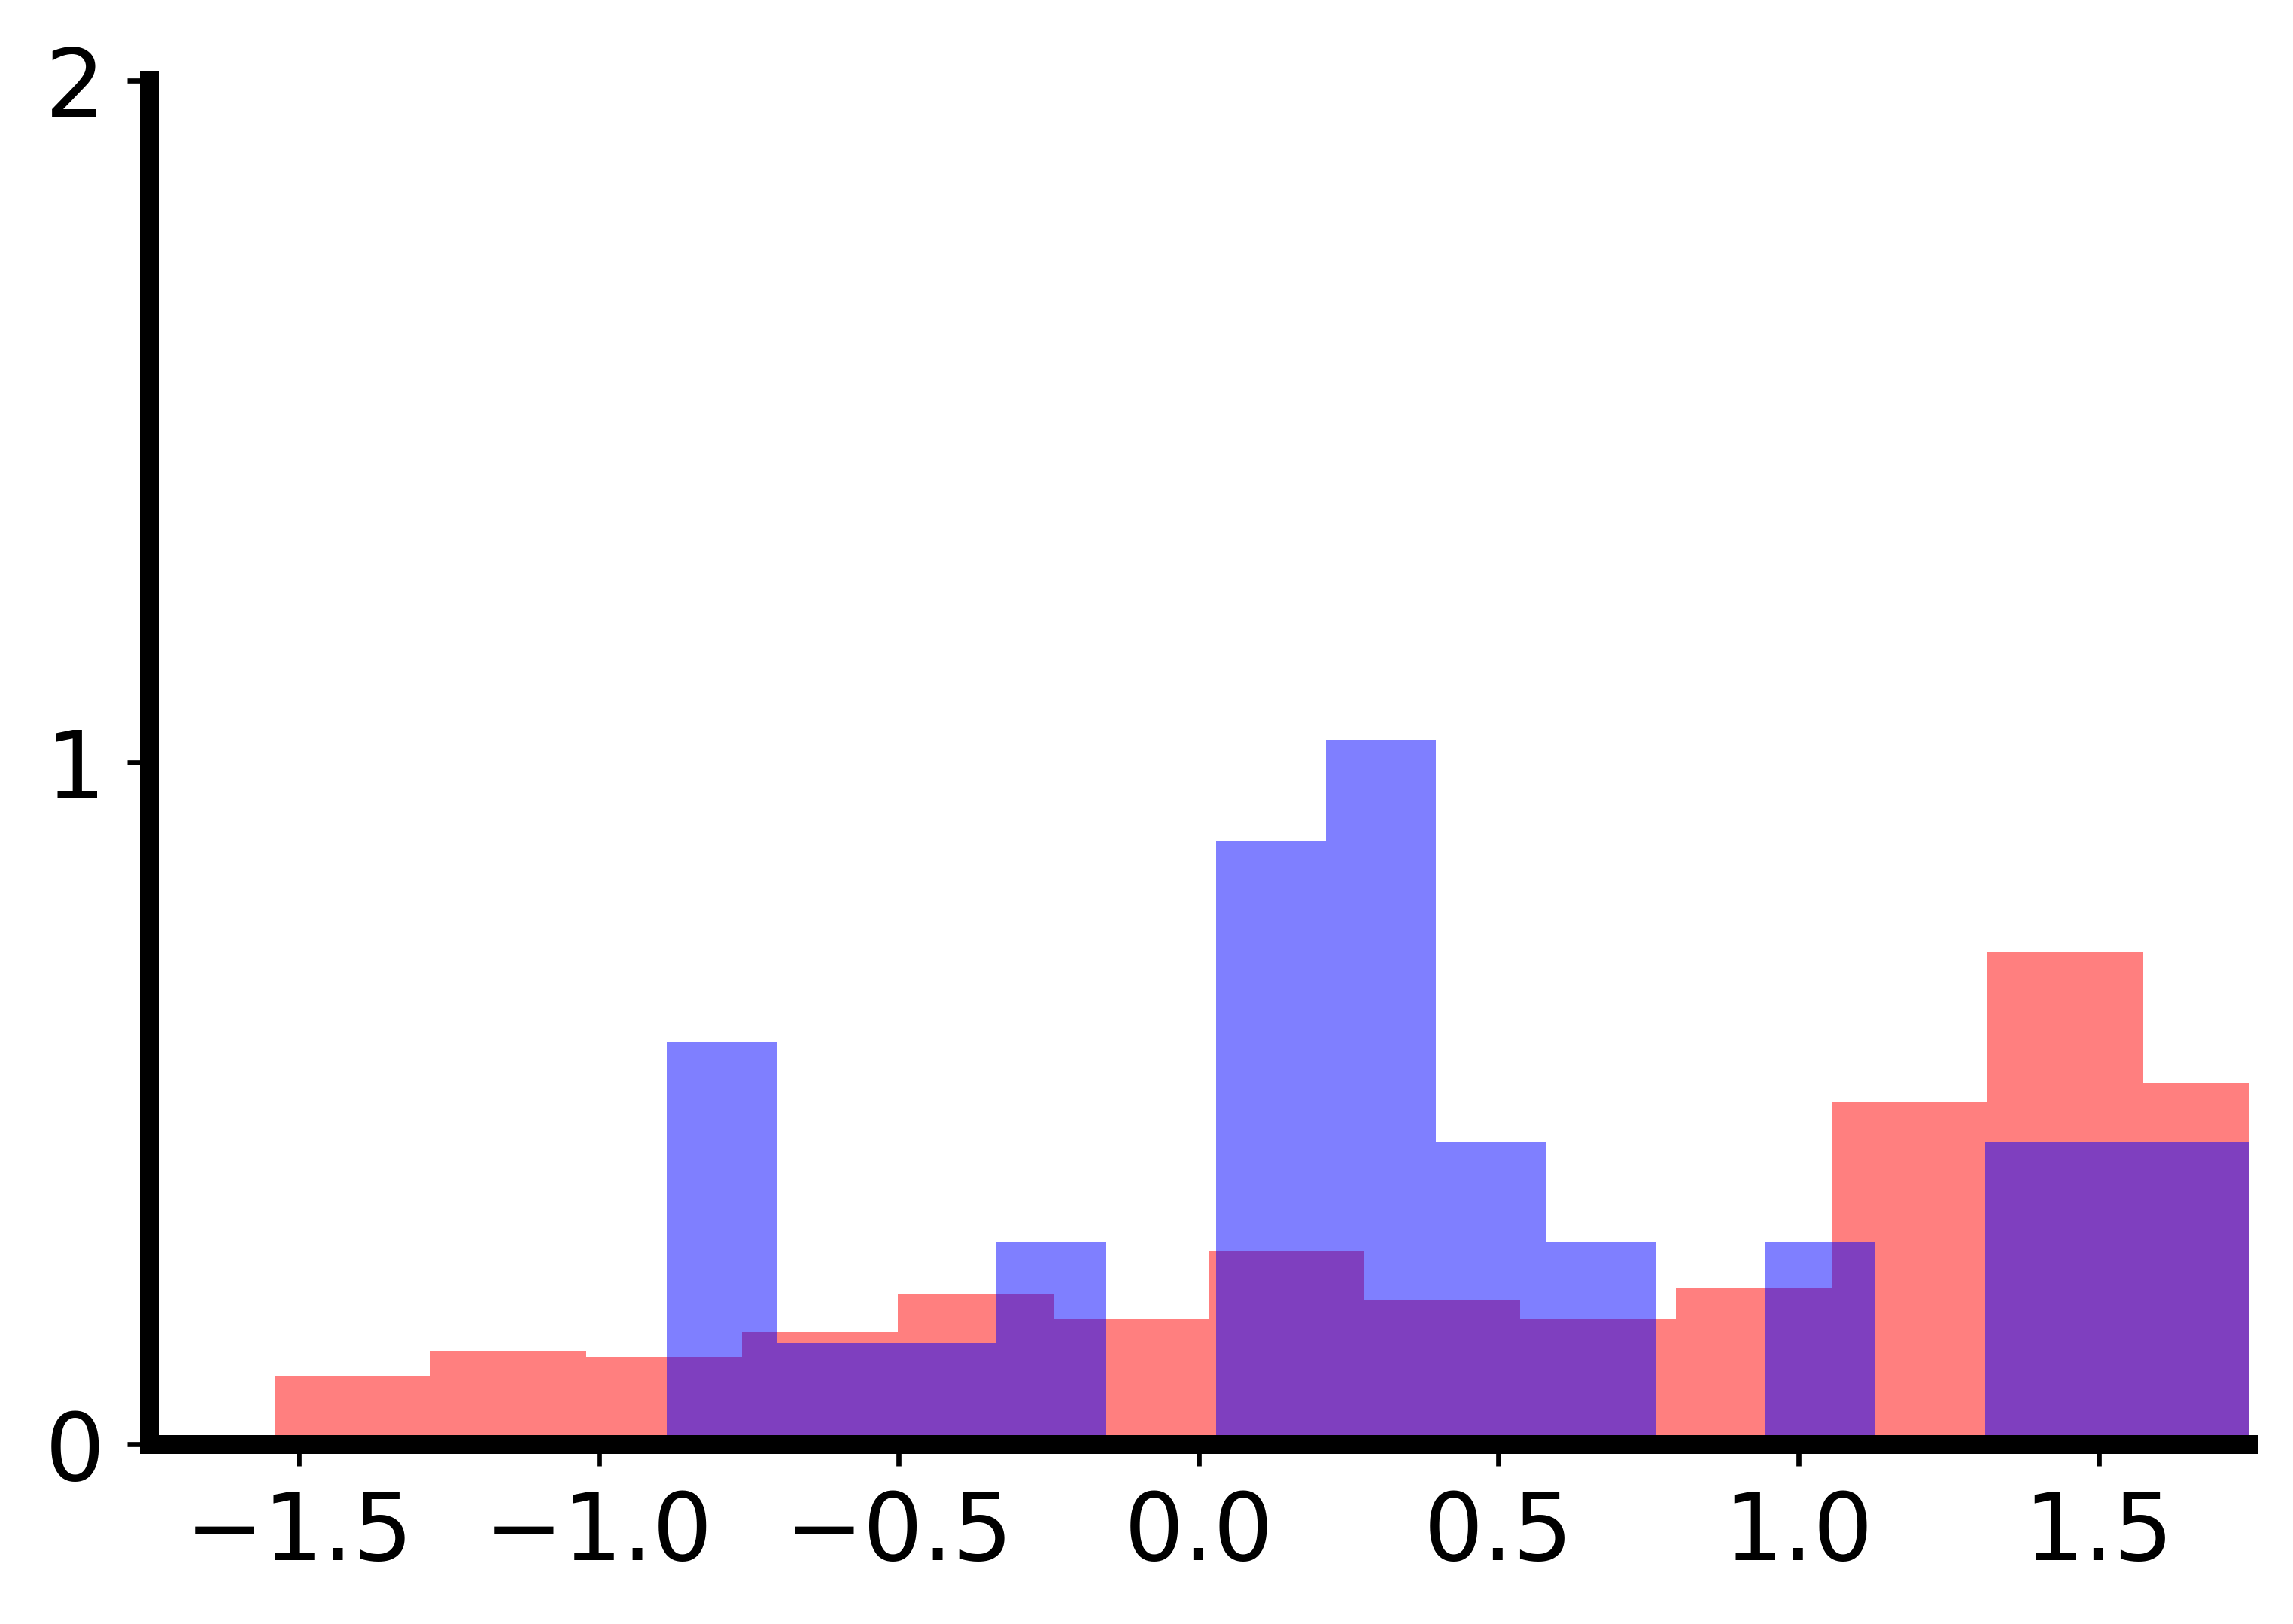

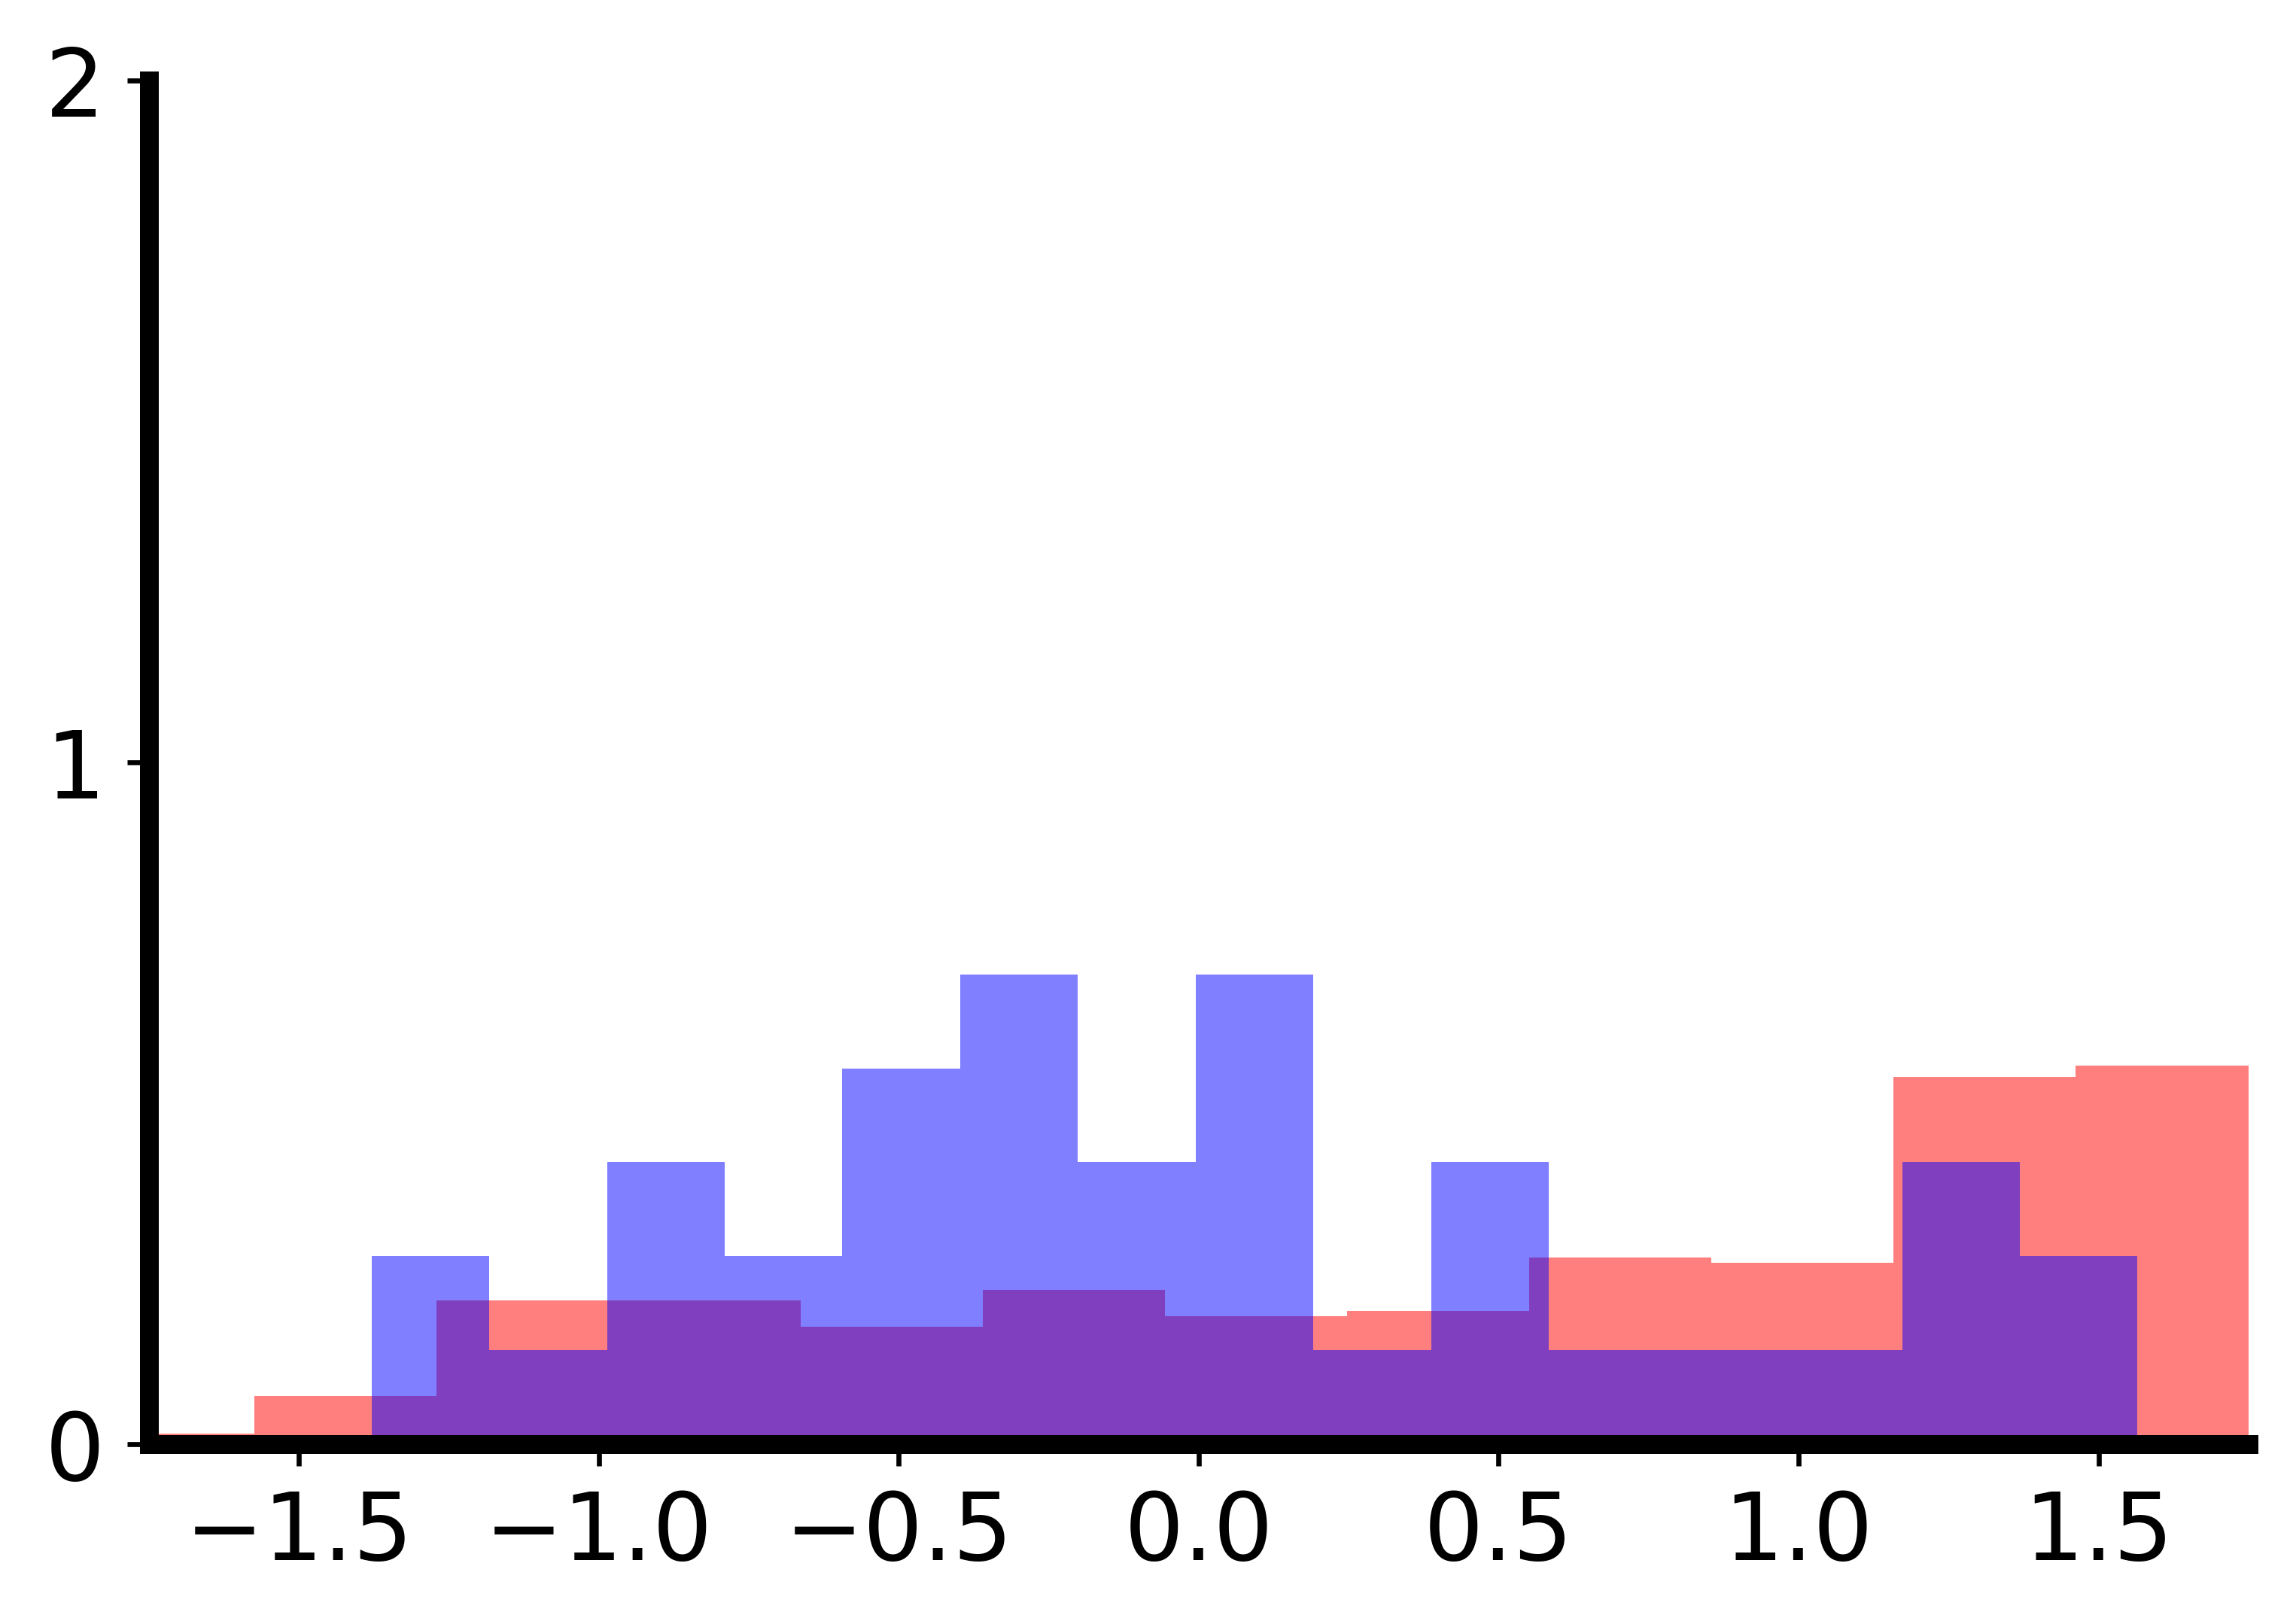

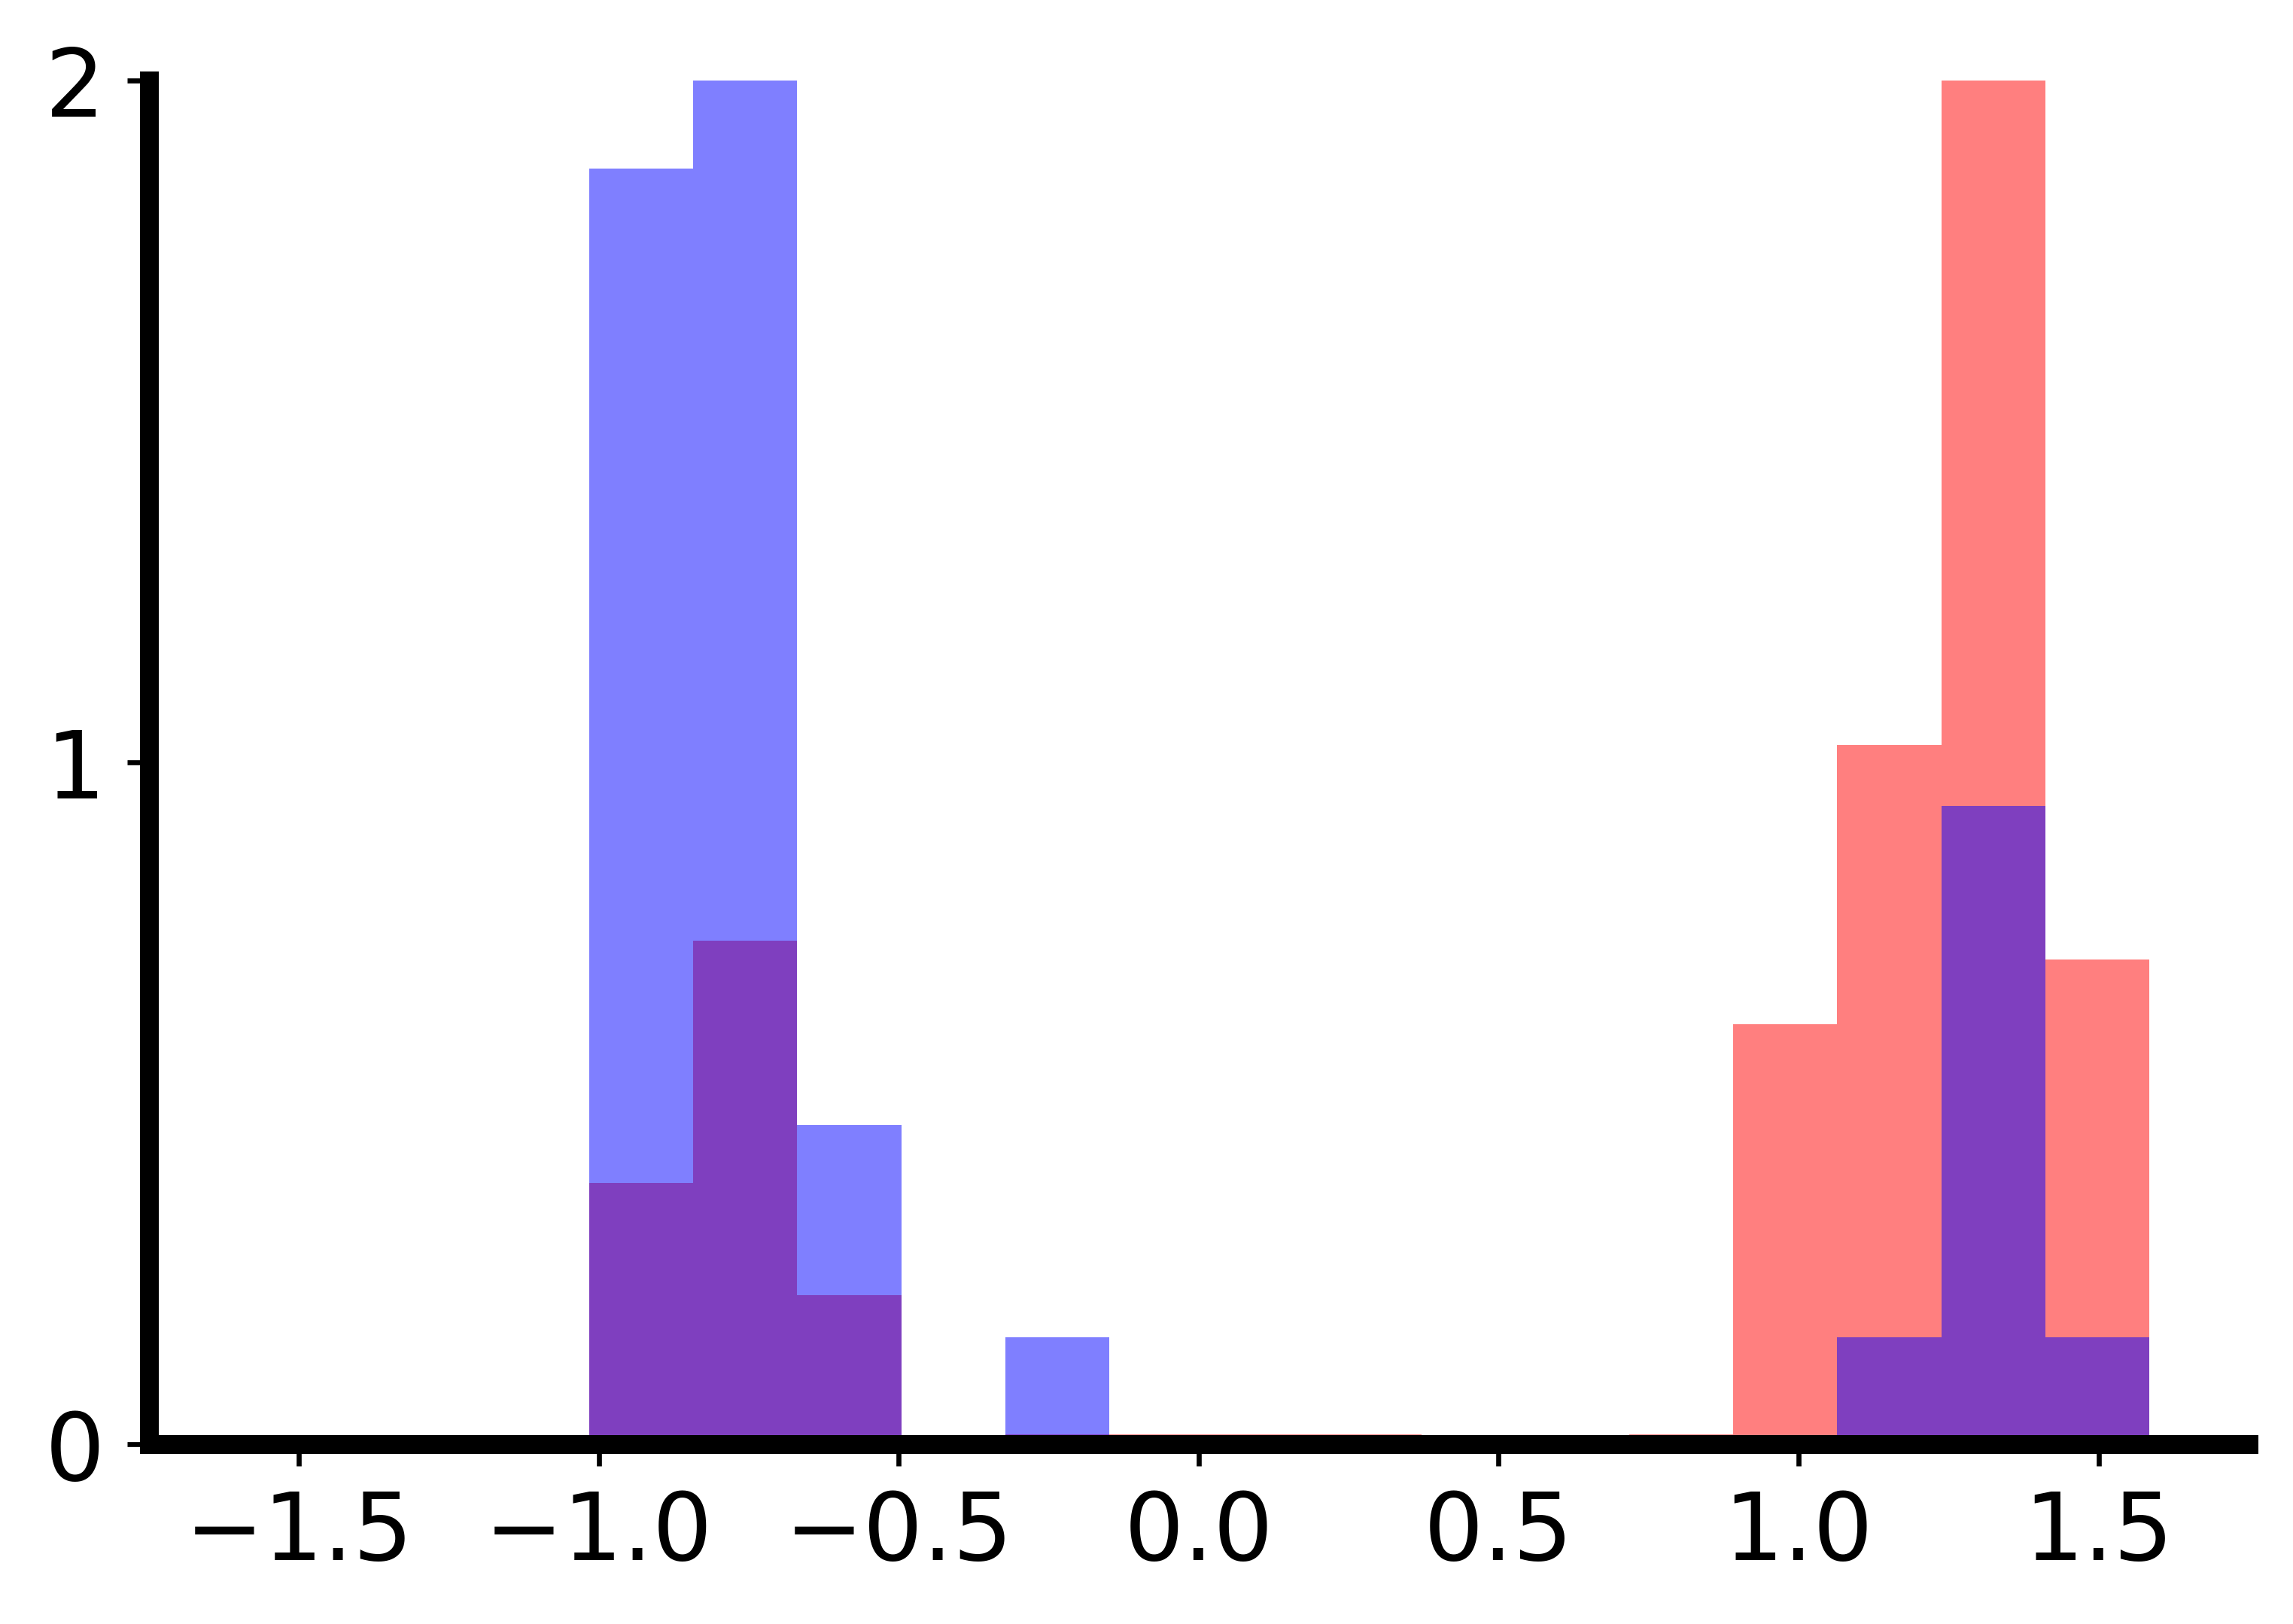

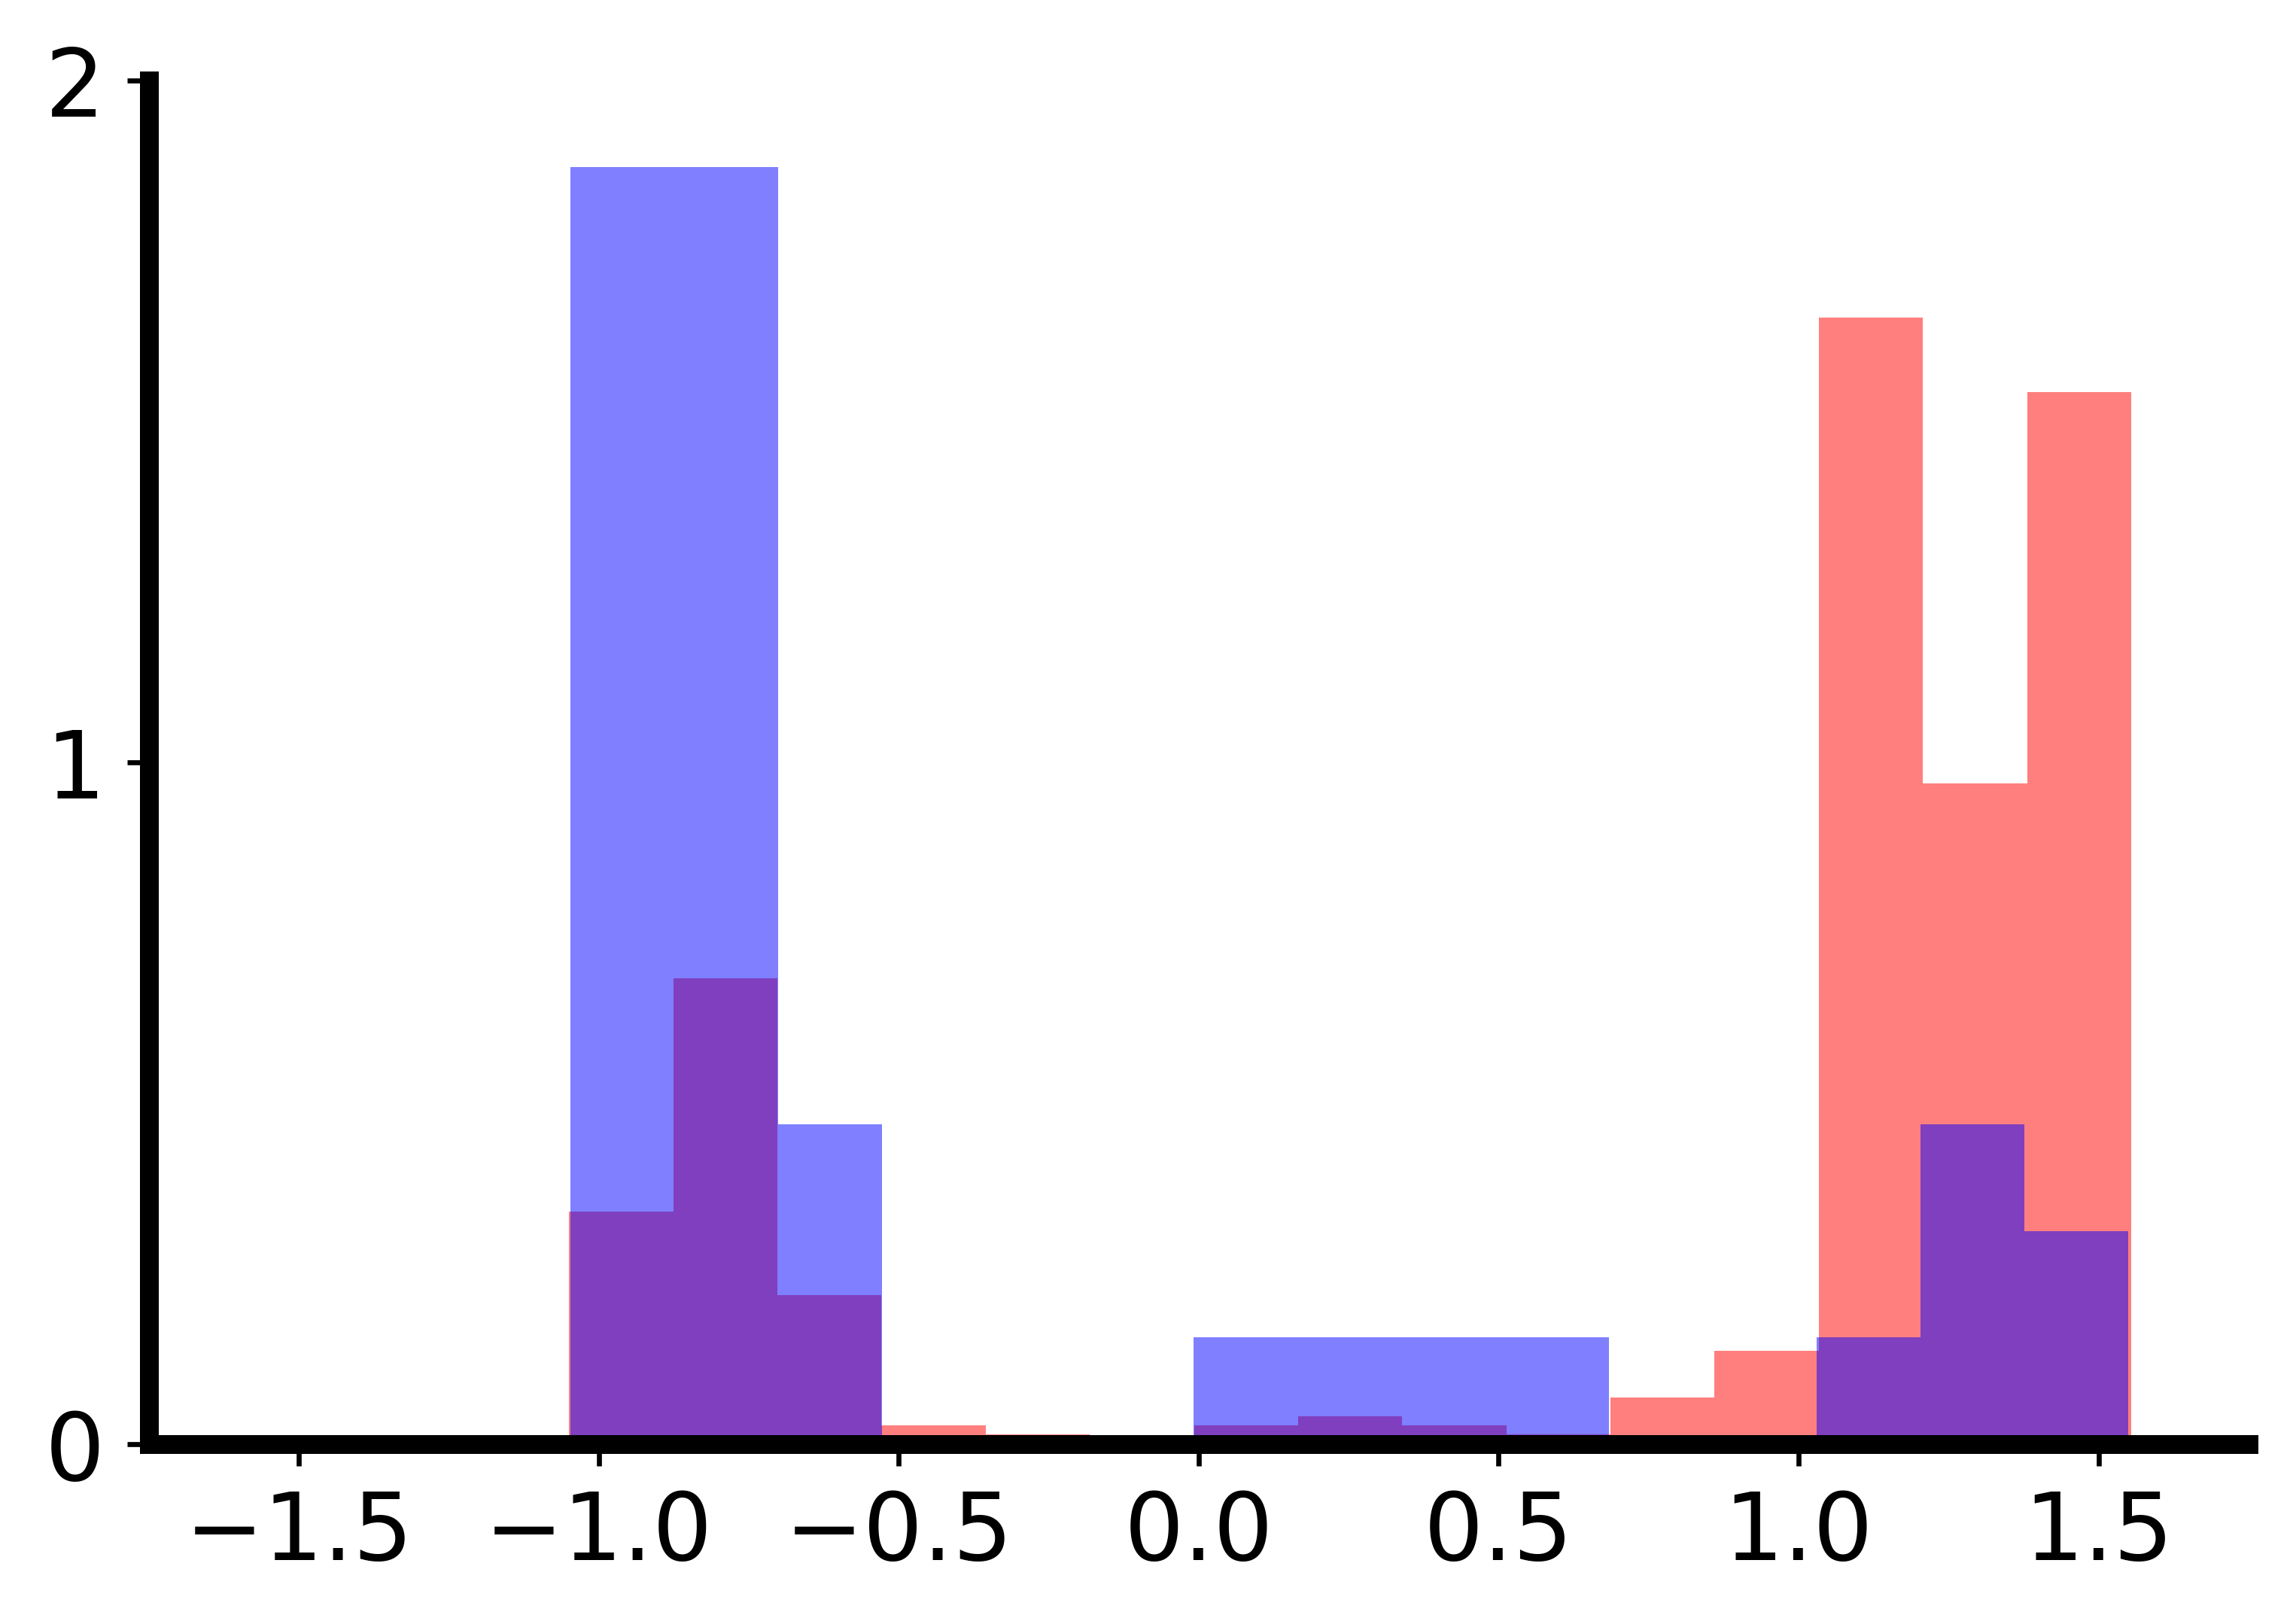

In [58]:
cluster_p = getHazardHistogramPlot_GBMLGG(model='path', c=[(-1.0, -0.5), (0, 0.75), (1, 1.5)])
cluster_g = getHazardHistogramPlot_GBMLGG(model='graph', c=[(-1.0, 0.0), (0.0, 1.0), (1, 1.5)])
cluster_o = getHazardHistogramPlot_GBMLGG(model='omic', c=[(-1.0, -0.5), (1, 1.25), (1.25, 1.5)])
cluster_pgo = getHazardHistogramPlot_GBMLGG(model='pathgraphomic_fusion', c=[(-1.0, -0.5), (1, 1.25), (1.25, 1.5)])
cluster_results = pd.concat([cluster_p, cluster_g, cluster_o, cluster_pgo])
cluster_results

In [84]:
for model in tqdm(['path', 'graph', 'omic', 'pathgraphomic_fusion']):
    makeHazardBoxPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model=model)
    makeHazardSwarmPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model=model)
    makeKaplanMeierPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model=model)

100%|██████████| 4/4 [01:01<00:00, 15.36s/it]


In [67]:
for model in tqdm(['path', 'pathgraphomic_fusion']):
    makeKaplanMeierPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model=model, plot_gt=False)

100%|██████████| 2/2 [00:07<00:00,  3.91s/it]


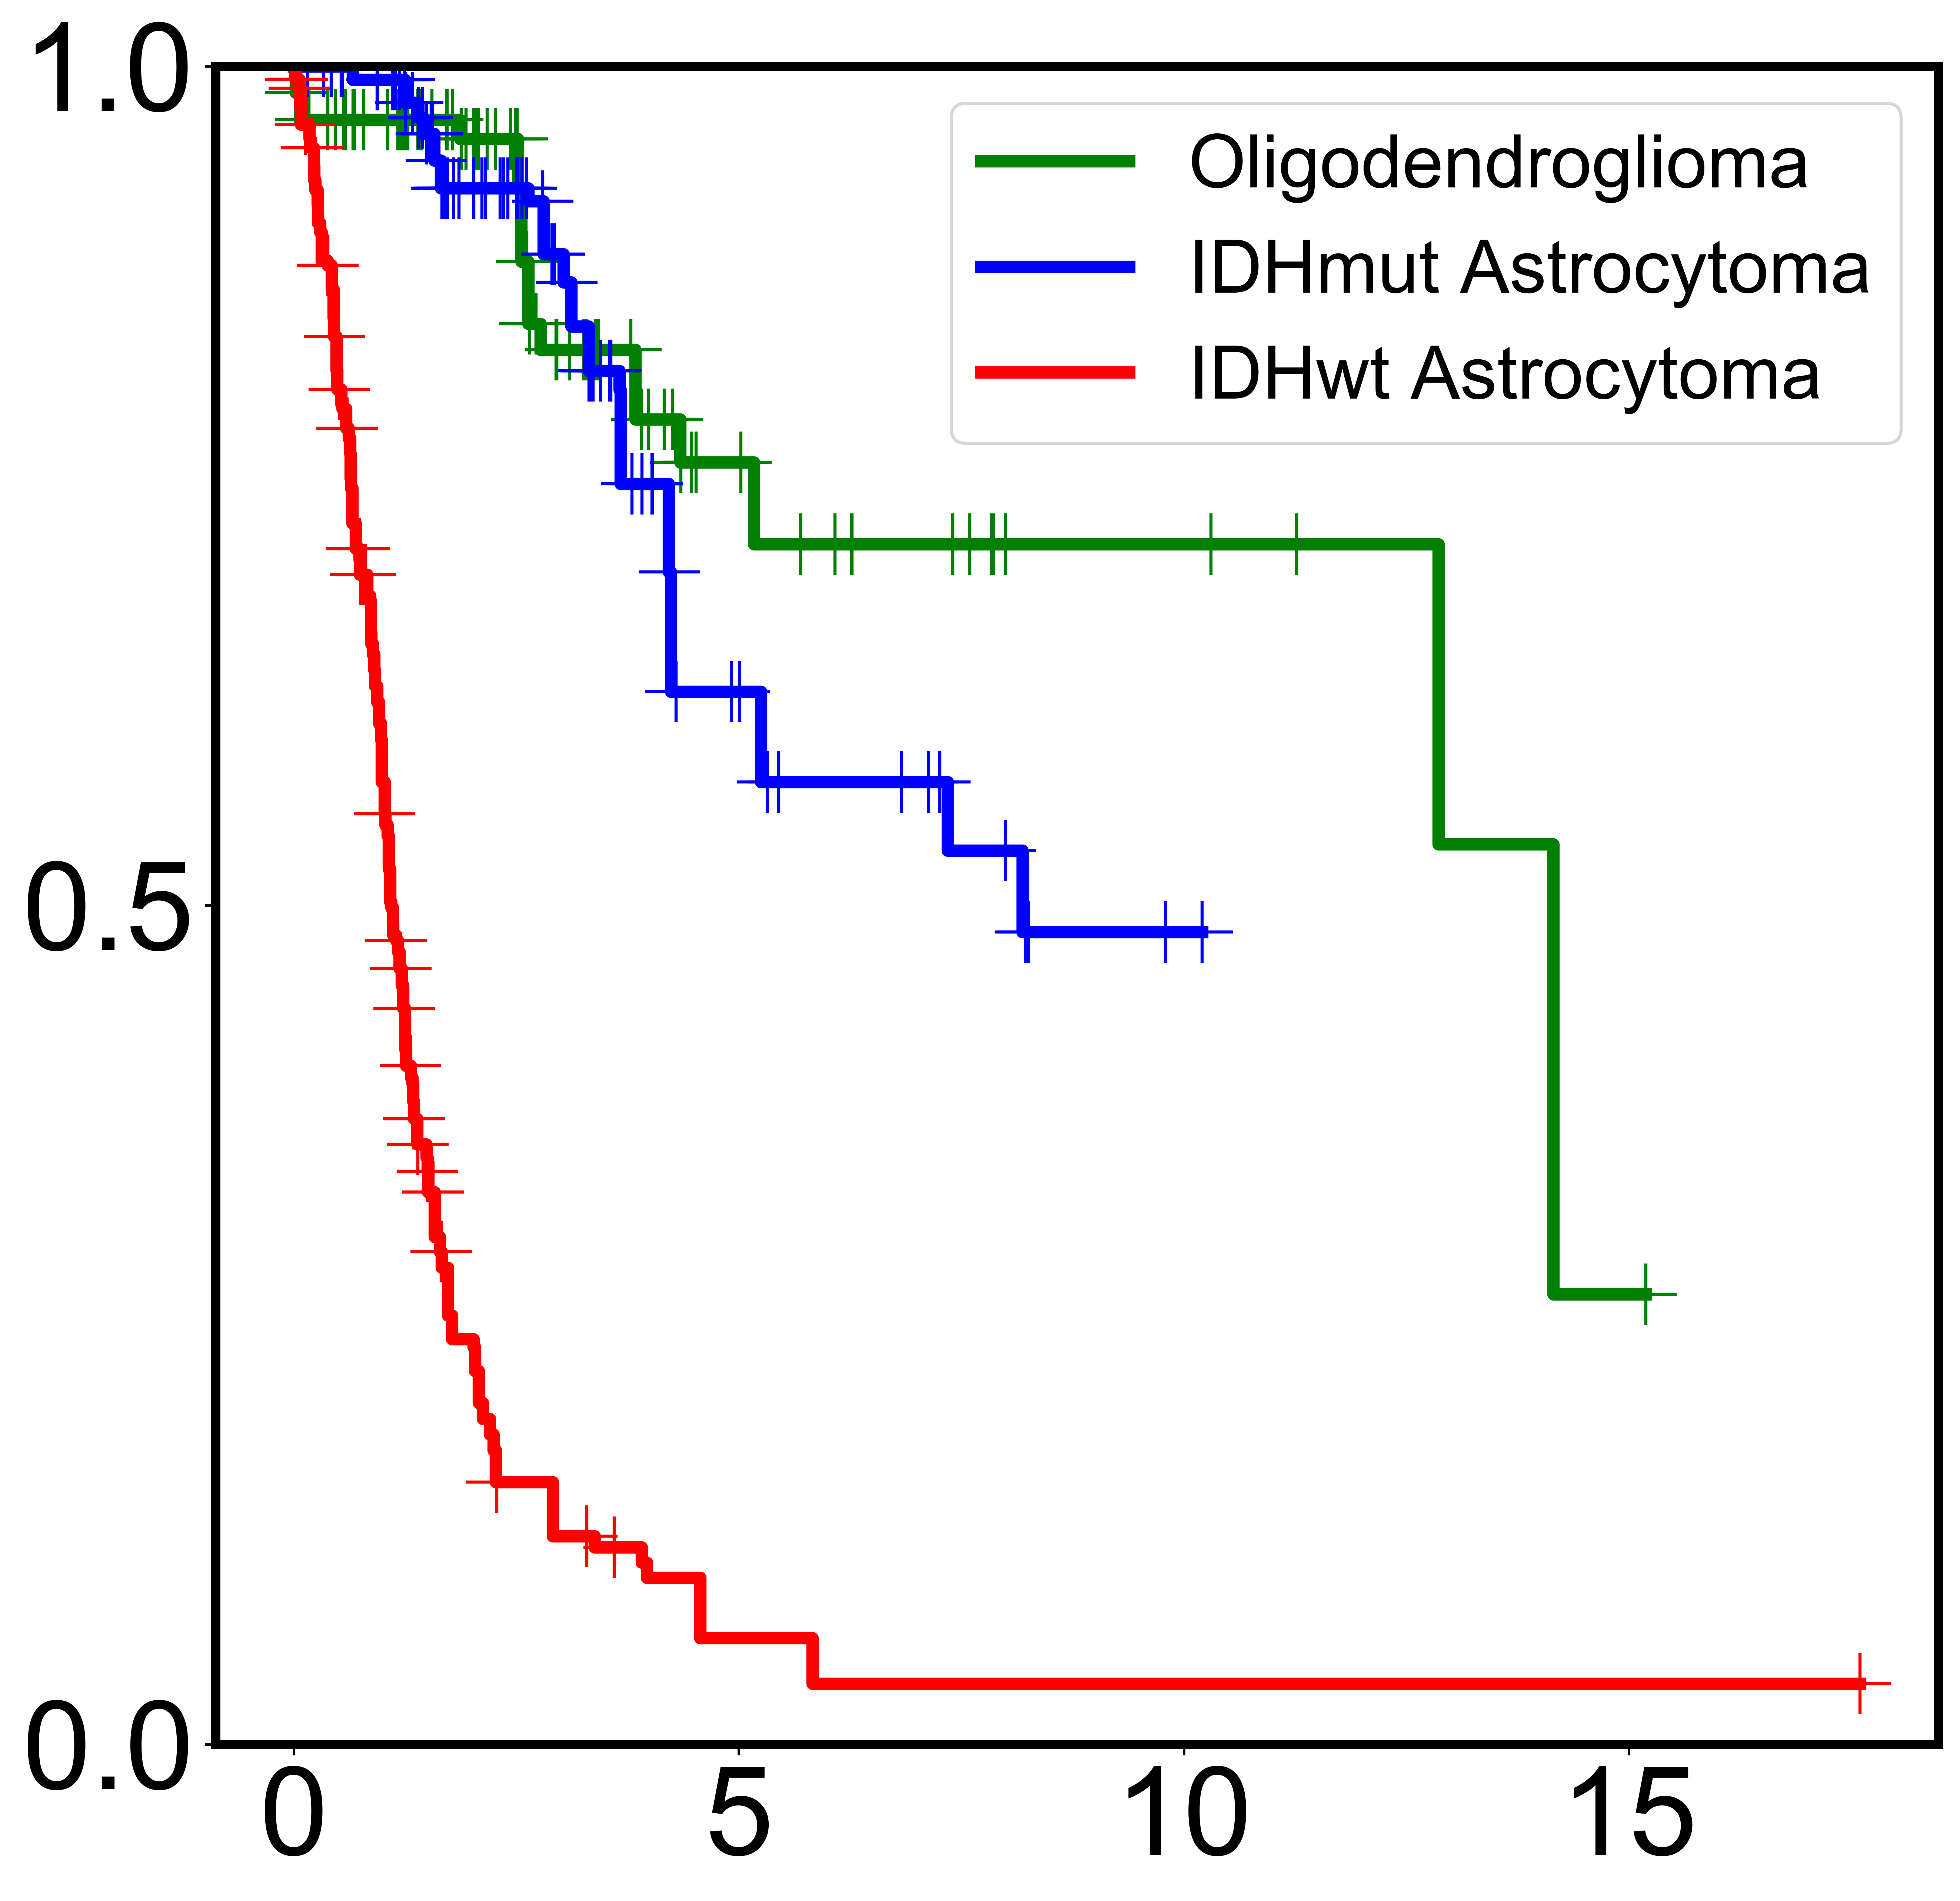

In [65]:
makeKaplanMeierPlot_Baseline(model='Histomolecular subtype')